In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [1]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [2]:
# import data_analysis_function

In [3]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [4]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [2]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal

from dataset_analysis import check_A_B_blast_furnace
from dataset_analysis import no_zero_value_in_target

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [3]:
from dataset_analysis import remove_rw_column_1

In [4]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [5]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
# print(type(correlation_threshold_min_value))
print(correlation_threshold_max_value)
print(correlation_threshold_min_value)

0.9
0.5


In [6]:
initial_dataframe = create_dataframe(filepath_server)

In [7]:
def create_dateTime(dataframe):
    dataframe = dataframe.sort_index()
    dataframe['dateTime'] = pd.to_datetime(dataframe['longTime'], unit='ms')
    dataframe = dataframe.drop(['longTime'], axis=1)
    try:
        dataframe.drop(['row ID'], axis = 1)
    except:
        None
    
    return dataframe


df_1 = create_dateTime(initial_dataframe)

In [8]:
def distinct_month_1(dataframe, target_column,month_key):
    array_df = []
    for i in month_key:
        req_data_1=dataframe.loc[(dataframe[target_column]==i)]
        req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
        array_df.append(req_frame_1)
    
    return array_df

In [9]:
def draw_month(month_key_value, dict_of_month,target_column):
    for i in month_key_value:
        value = dict_of_month[i]
        value.iloc[:].plot(y=[target_column])
        plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
        plt.xlabel('range')
        plt.ylabel('value')

        plt.rcParams['figure.figsize'] = (5,5)
        plt.savefig(str(i) + '.jpg')
        plt.show()

In [10]:
# df_2 = df_1.copy()
# df_2 = df_2.set_index('dateTime')

def create_month(dataframe, target_column_month):
    dataframe = dataframe.set_index('dateTime')
    dataframe['year'] = pd.DatetimeIndex(dataframe.index).year
    dataframe['month'] = pd.DatetimeIndex(dataframe.index).month
    
    dict_of_month = {k:v for k,v in dataframe.groupby('month')}
    month_key_value = collections.OrderedDict(dict_of_month)
    
    month_array_df = distinct_month_1(dataframe, target_column_month, month_key_value)
    
#     draw_month_fig = draw_month(month_key_value, dict_of_month, target_column)
    
    return dataframe, month_array_df

date_df, month_array_df = create_month(df_1, 'month')

In [13]:
def specific_month_df(dataframe,target_column_month):
    req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) | (dataframe[target_column_month]==4) | (dataframe[target_column_month]==5) ]
    req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
    return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [14]:
def drop_month_year(dataframe):
#     dataframe = dataframe.drop(['year','month'], axis=1)
    dataframe = dataframe.reset_index()
    return dataframe

# spec_month = drop_month_year(date_df)
spec_month = drop_month_year(specific_month_df)

In [15]:
print(spec_month.shape)

(85350, 4241)


In [17]:
spec_month.tail(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
85348 2019-02-11 20:58:00     72.030143     37.870419     90.988125   
85349 2019-02-11 20:57:00     72.030143     28.019753     90.988125   

       AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
85348     34.451579     88.177774     90.449495     93.353135     18.897334   
85349     25.369044     92.387543     90.208292     93.674403     10.971169   

       AEAGHOAWE3T1  ...  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
85348     51.451800  ...     41.687065     39.195484     77.545509   
85349     51.916376  ...     41.687065     39.000517     77.532654   

       RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  \
85348     75.505091     64.437859     56.966760      0.659977     20.066390   
85349     75.407204     64.213670     57.013879      0.658391     19.815859   

       year  month  
85348  2019      2  
85349  2019      2  

[2 rows x 4241 columns]

In [102]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [103]:
# targ = pd.DataFrame(target_df)

In [104]:
# df_month = pd.DataFrame(index=df_2.index)

In [105]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [106]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [107]:
# df_month

In [108]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [109]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [110]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


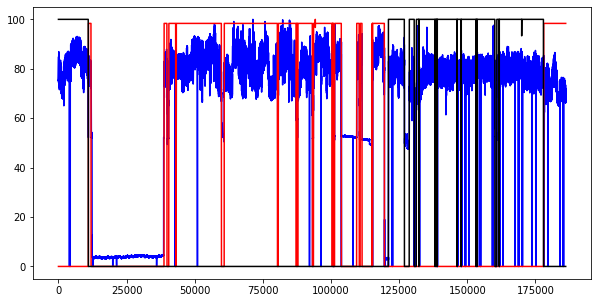

In [30]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
# test_new = conversion_timestamp_to_unixtime(initial_dataframe)

In [18]:
test_new = spec_month

In [19]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID
test_new_1 = test_new

In [20]:
# test_new_2 = remove_rw_column_1(test_new_1,'RW')
test_new_2 = test_new_1

In [21]:
test_new_2.shape
# test_new_2.shape[0]

(85350, 4241)

In [22]:

# Taking define number of row from the beginning
# multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])
multivariate_data = alter_time(test_new_2, start_pos,test_new_2.shape[0])

In [23]:
multivariate_data.tail(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
1 2019-05-31 11:59:00     78.489198     18.032864     94.729949     16.893391   
0 2019-05-31 12:00:00     78.950554     17.756955     94.729949     22.847305   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
1     76.989465     94.116938     92.650885     10.771140     58.478357  ...   
0     77.450826     93.794568     92.289550      9.162657     58.478357  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
1     42.113705     52.562319     73.763059     78.811924     67.425635   
0     42.057442     53.586021     73.763059     79.266092     68.208886   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  month  
1     61.739229      3.277154      6.658860  2019      5  
0     61.926264      3.276990      6.746716  2019      5  

[2 rows x 4241 columns]

In [24]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [25]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (85350, 4241)
<class 'pandas.core.frame.DataFrame'> (85350, 4241)


In [26]:
def check_A_B_blast_furnace_1(dataframe,furnace_signal_column_a,value_A, furnace_signal_column_b,value_B):
    req_data=dataframe.loc[(dataframe[furnace_signal_column_a]>=value_A) | (dataframe[furnace_signal_column_b]>=value_B)]
    req_frame=pd.DataFrame(req_data,columns=dataframe.columns)
    
    return req_frame

dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [27]:
def no_zero_value_in_target_1(dataframe, target_column, req_drop_value_target):
    req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
    req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
    return req_frame_1

dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [28]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [28]:
dataframe_no_zero_value_target_column.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
year                     int64
AEWIHO_T9AV2           float64
Length: 4241, dtype: object

In [29]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(85350, 4241)
(70436, 4241)
(70261, 4241)


In [30]:
dataframe_no_zero_value_target_column.tail(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
1 2019-05-31 11:59:00     78.489198     18.032864     94.729949     16.893391   
0 2019-05-31 12:00:00     78.950554     17.756955     94.729949     22.847305   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
1     76.989465     94.116938     92.650885     10.771140     58.478357  ...   
0     77.450826     93.794568     92.289550      9.162657     58.478357  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
1     42.113705     52.562319     73.763059     78.811924     67.425635   
0     42.057442     53.586021     73.763059     79.266092     68.208886   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  AEWIHO_T9AV2  
1     61.739229      3.277154      6.658860  2019     94.710922  
0     61.926264      3.276990      6.746716  2019     97.083113  

[2 rows x 4241 columns]

In [31]:
dataframe_no_zero_value_target_column_1 = dataframe_no_zero_value_target_column.reset_index()
dataframe_no_zero_value_target_column_2 = dataframe_no_zero_value_target_column_1.drop(['index'], axis=1)
print(dataframe_no_zero_value_target_column_2.shape)
dataframe_no_zero_value_target_column_2.head(2)

(70261, 4241)


dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0 2019-02-11 20:57:00     72.030143     28.019753     90.988125     25.369044   
1 2019-02-11 20:58:00     72.030143     37.870419     90.988125     34.451579   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     92.387543     90.208292     93.674403     10.971169     51.916376  ...   
1     88.177774     90.449495     93.353135     18.897334     51.451800  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
0     41.687065     39.000517     77.532654     75.407204     64.213670   
1     41.687065     39.195484     77.545509     75.505091     64.437859   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  AEWIHO_T9AV2  
0     57.013879      0.658391     19.815859  2019     66.387058  
1     56.966760      0.659977     20.066390  2019     66.765225  

[2 rows x 4241 columns]

In [33]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [34]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [35]:
nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [119]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [37]:
print(type(dataframe_drop_column_with_same_value))
print(dataframe_drop_column_with_same_value.shape)
dataframe_drop_column_with_same_value.tail(1)

<class 'pandas.core.frame.DataFrame'>
(70261, 3060)


dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
70260 2019-05-31 12:00:00     78.950554     17.756955     94.729949   

       AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
70260     22.847305     77.450826     93.794568      92.28955      9.162657   

       AEAGHOAWE3T1  ...  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  \
70260     58.478357  ...     80.510376     42.057442     53.586021   

       RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  \
70260     73.763059     79.266092     68.208886     61.926264       3.27699   

       RWWIHOSUMAV0  AEWIHO_T9AV2  
70260      6.746716     97.083113  

[1 rows x 3060 columns]

In [38]:
dataframe_drop_column_with_same_value.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 3060, dtype: object

In [122]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [123]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [39]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [40]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 3060, dtype: object

In [46]:
# def remove_rw_column_1(dataframe,req_string):
#     print(req_string)
#     new_variable = []
#     for i in dataframe:
#         x = i[:2]
#         if x != req_string:
#             new_variable = np.append(new_variable, i)
    
#     dataframe = dataframe.iloc[:][new_variable]
#     return dataframe

In [47]:
# no_DE = remove_rw_column_1(dataframe_no_string,'DE')

In [48]:
# no_CW = remove_rw_column_1(no_DE,'CW')

In [40]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

In [41]:
print(dataframe_no_string.shape)
# print(no_DE.shape)
# print(no_CW.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)

(70261, 3060)


In [42]:
plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [43]:
# Make dataframe with dateTime index
def dataframe_datetime(dataframe):
    dataframe_datetime = dataframe.set_index('dateTime')
    return dataframe_datetime

dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [130]:
# dataframe_datetime = dataframe_datetime.drop(['longTime'], axis = 1)

In [44]:
dataframe_datetime.shape

(70261, 3059)

In [45]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [46]:
# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [49]:
correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')

In [50]:
dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')

In [47]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [48]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(70261, 7)


AEDAHO_T9_V2  AEWIGHG9_AG1  AEWIGHG9_AG2  AEWIGHG9_AG3  AEWIGHG9__P0  \
count  70261.000000  70261.000000  70261.000000  70261.000000  70261.000000   
mean      69.824475     84.930246     84.871000     84.502967     80.740303   
std        9.037717      8.920842      8.832881      8.841746      9.614896   
min        0.000000      0.491885      0.304776      0.395437      0.088512   
25%       66.203591     81.306099     81.301300     80.917900     77.250552   
50%       71.052251     83.388000     83.381699     82.985802     82.730834   
75%       75.202271     85.703697     85.714302     85.319801     87.127251   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

       AEWIGHG9__T0  AEWIHO_T9AV2  
count  70261.000000  70261.000000  
mean      78.251819     76.217896  
std        6.596994      5.621554  
min        7.407661      2.808362  
25%       75.400177     73.730408  
50%       79.399484     75.902702  
75%       82.277789     78.432154  
max       94.712749     98.076727

In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [86]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [119]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [51]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder  has already created


In [52]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2019-08-28


In [53]:
dataframe_high_correlation.shape

(70261, 7)

7


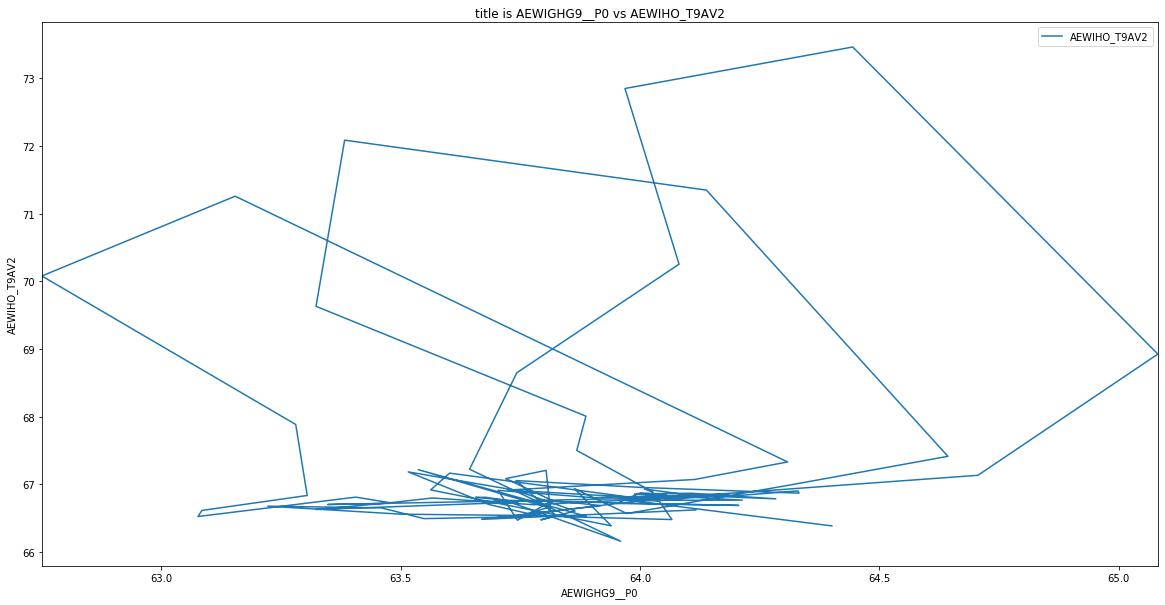

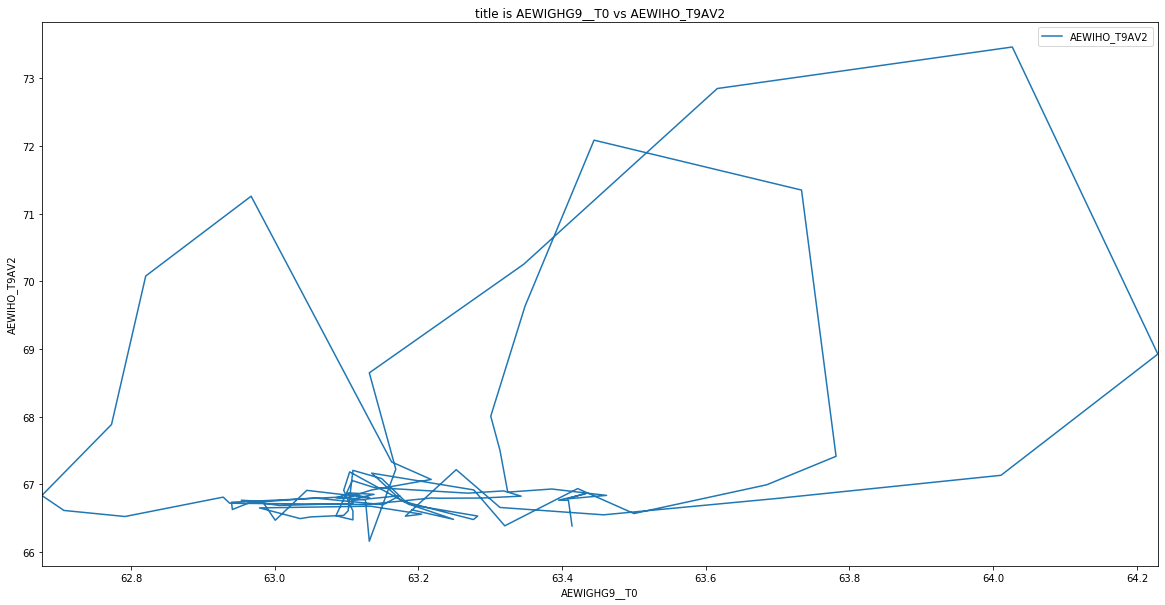

In [54]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [55]:
def make_dataset(dataframe, percentage):
    dataset = np.array(dataframe)
    NumberOfElements = int(len(dataset) * percentage)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    print('test_input shape: ', test_input.shape)
    test_output = dataset[NumberOfElements:len(dataset), -1]
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

In [56]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation,0.99)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

Number of Elements for training:  69558
dataset length:  70261
train_input shape:  (69558, 6)
train_output shape:  (69558,)
test_input shape:  (703, 6)
test_output shape:  (703,)


In [57]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file now created


------- LinearRegression


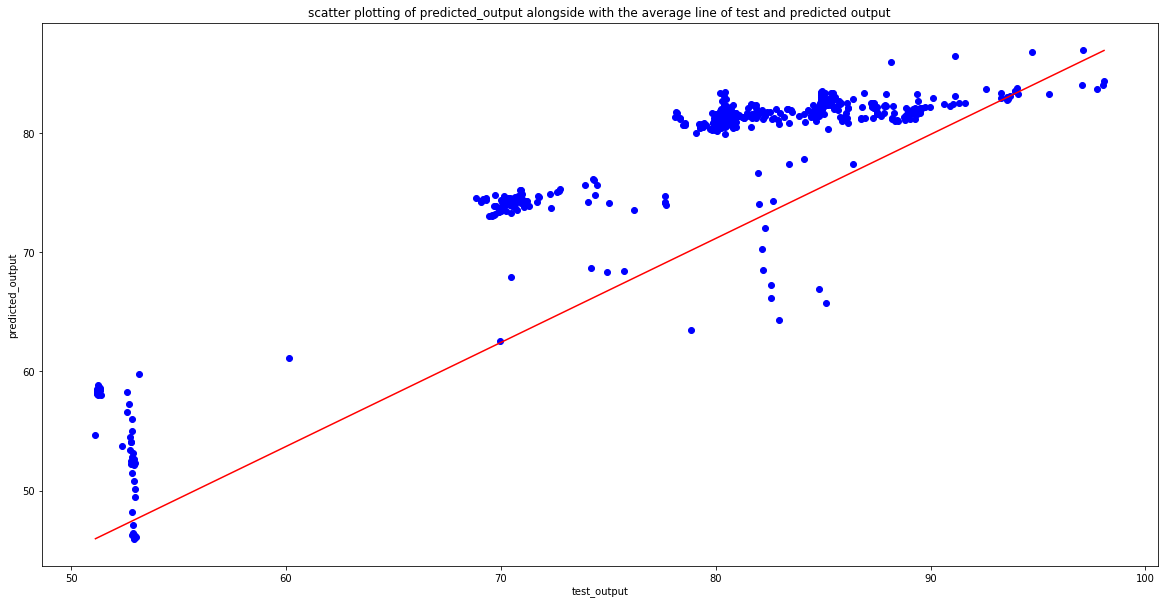

<class 'numpy.ndarray'>


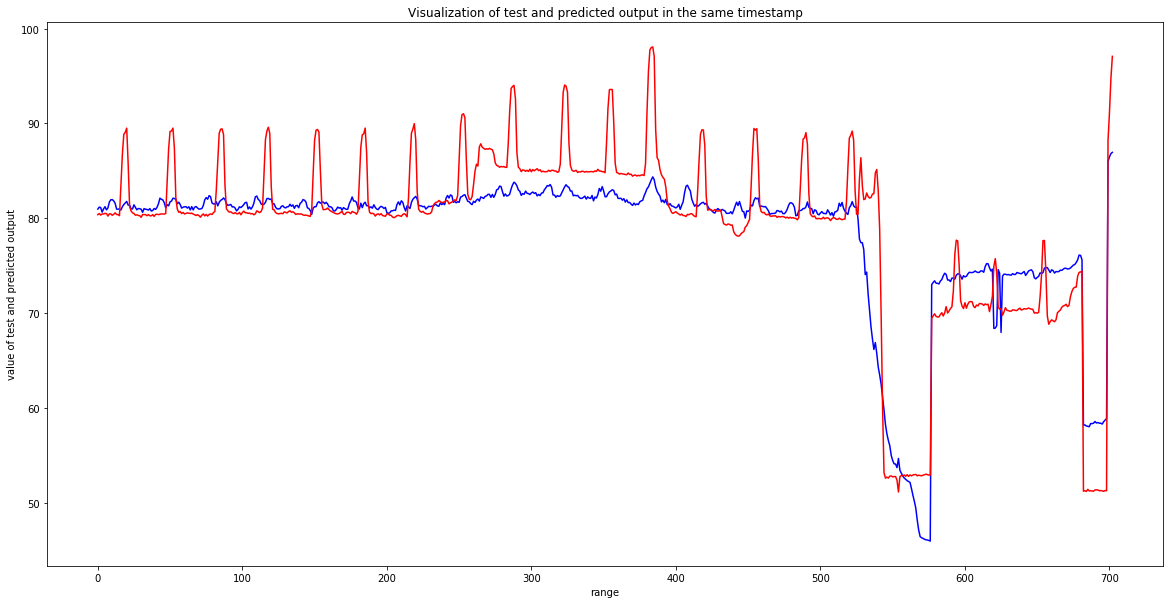

r_2 statistic: 0.79
Mean_absolute_error: 2.94
Mean squared error: 17.60
RMSE:  4.195291798171661
!!!!---------------!!!!----------------!!!!
------- Lasso


<class 'numpy.ndarray'>


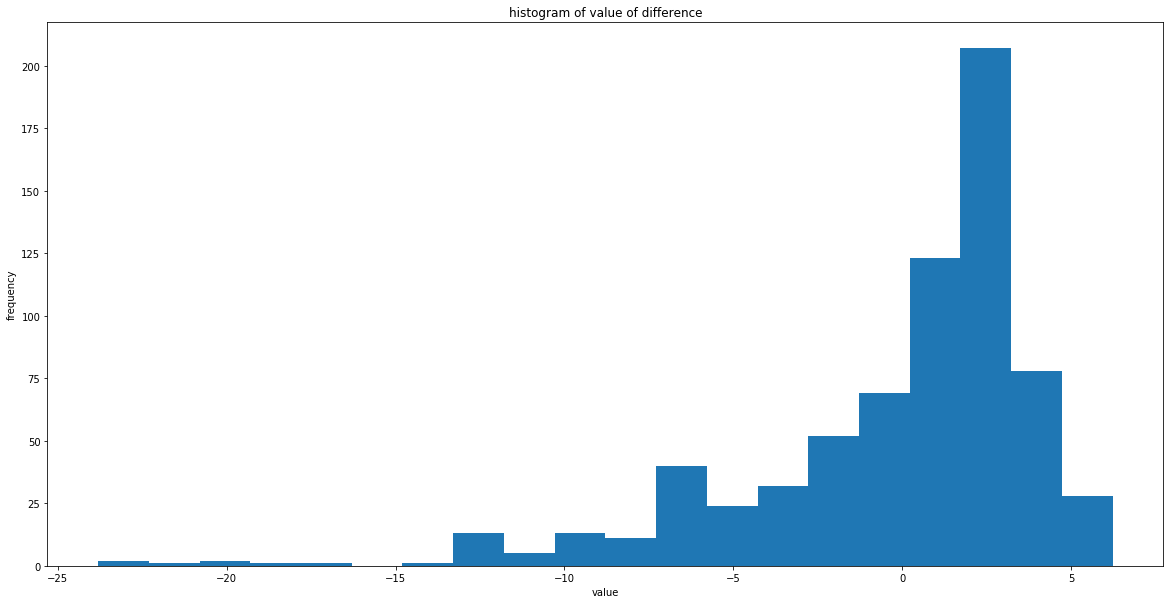

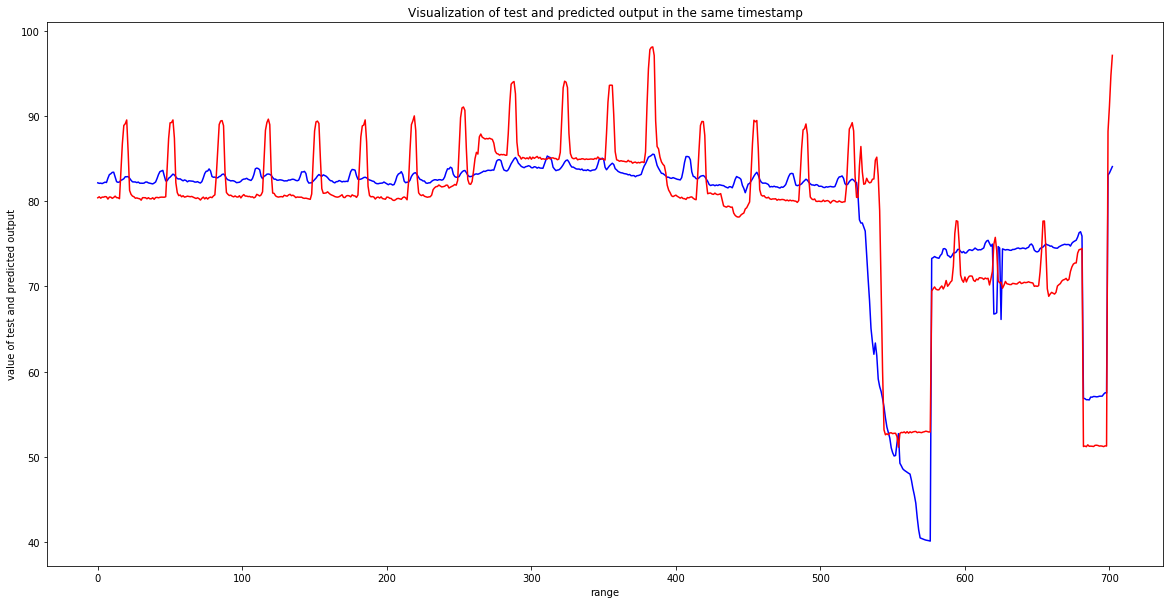

r_2 statistic: 0.77
Mean_absolute_error: 3.29
Mean squared error: 19.92
RMSE:  4.462717153993146
!!!!---------------!!!!----------------!!!!
------- Ridge


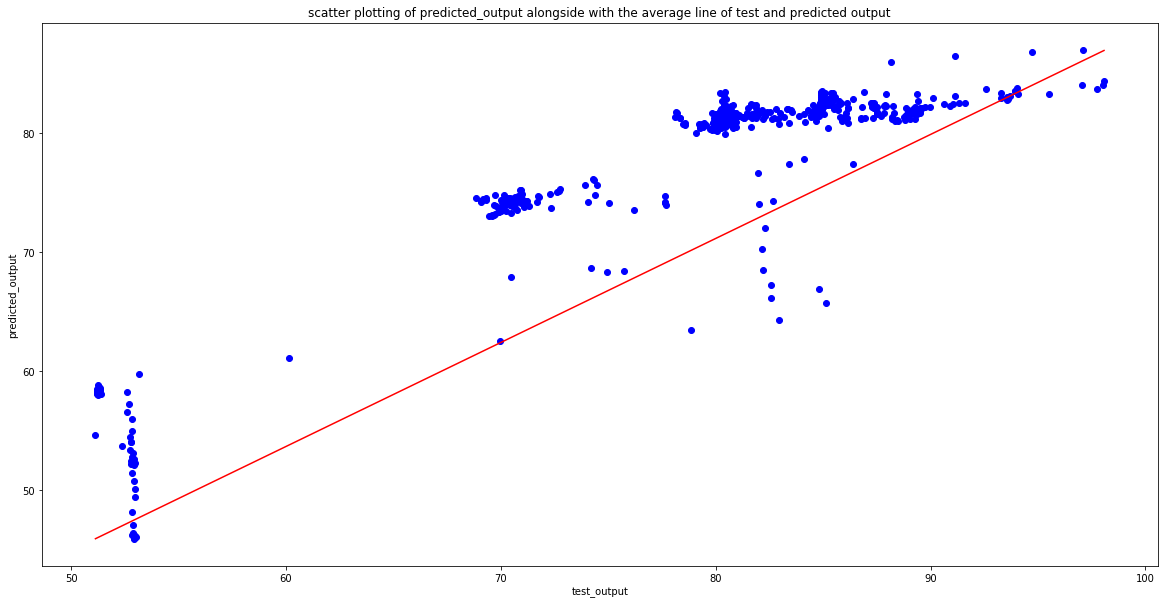

<class 'numpy.ndarray'>


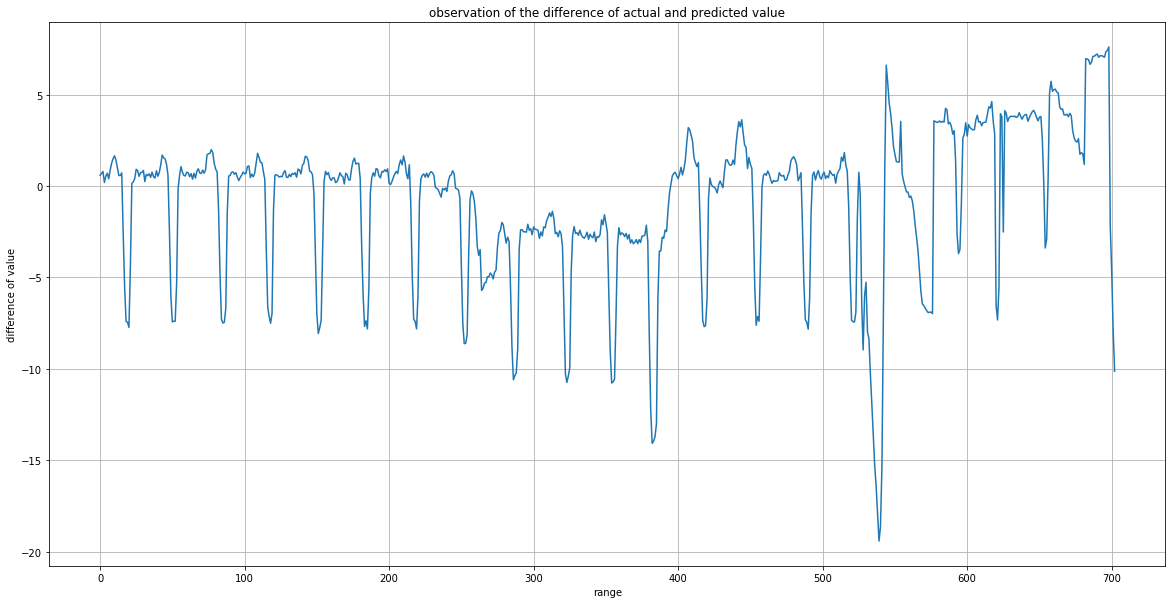

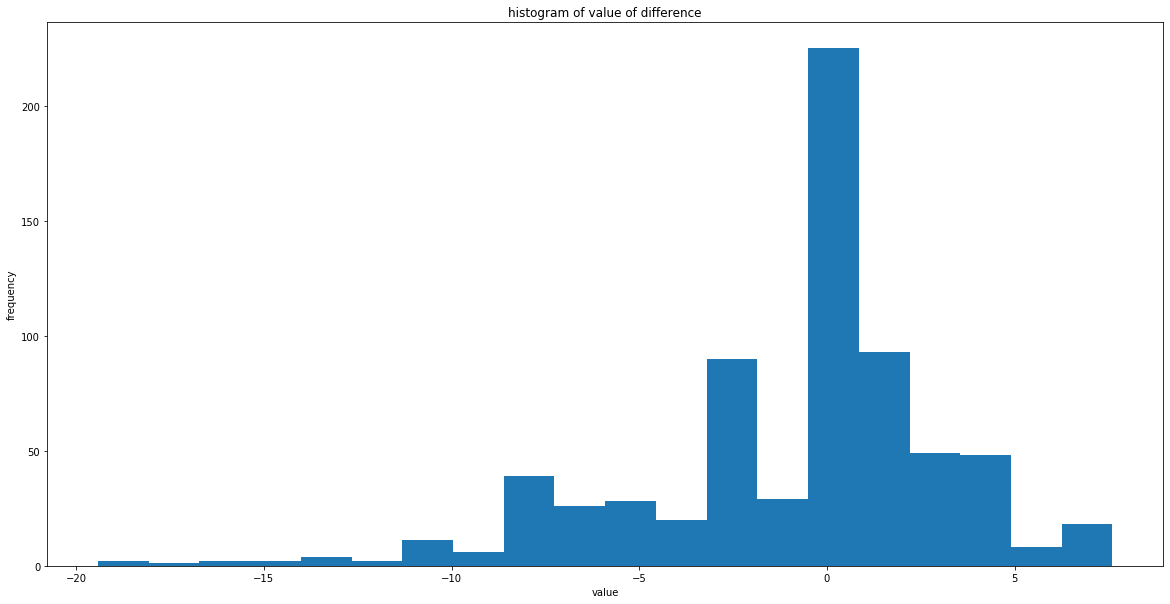

r_2 statistic: 0.79
Mean_absolute_error: 2.94
Mean squared error: 17.60
RMSE:  4.1952039493178
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


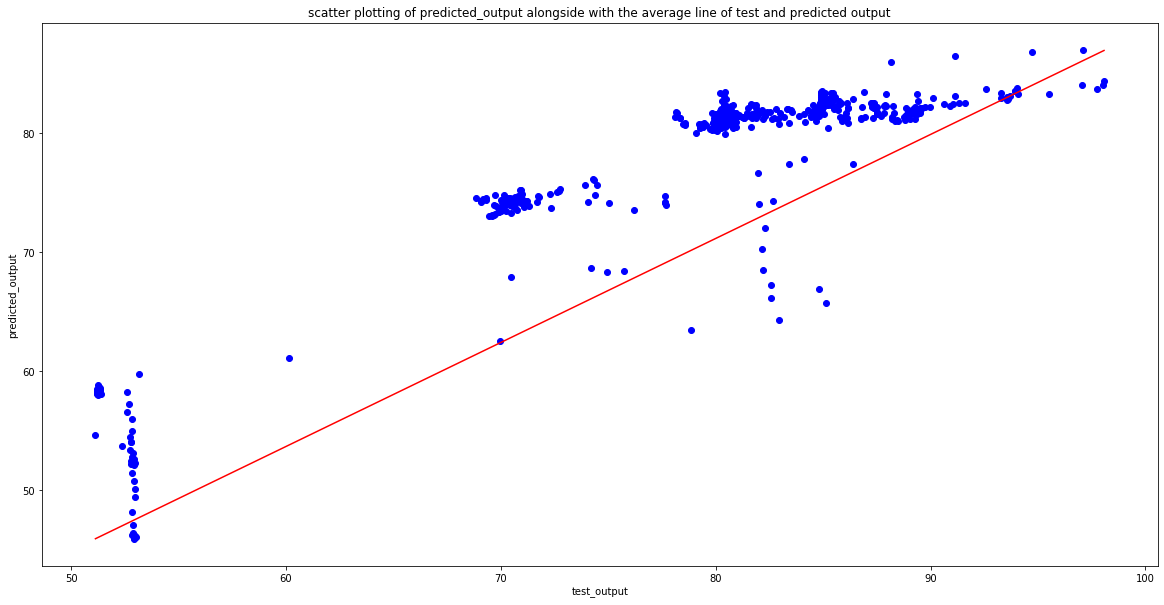

<class 'numpy.ndarray'>


r_2 statistic: 0.79
Mean_absolute_error: 2.94
Mean squared error: 17.60
RMSE:  4.195175289975023
!!!!---------------!!!!----------------!!!!
------- tree


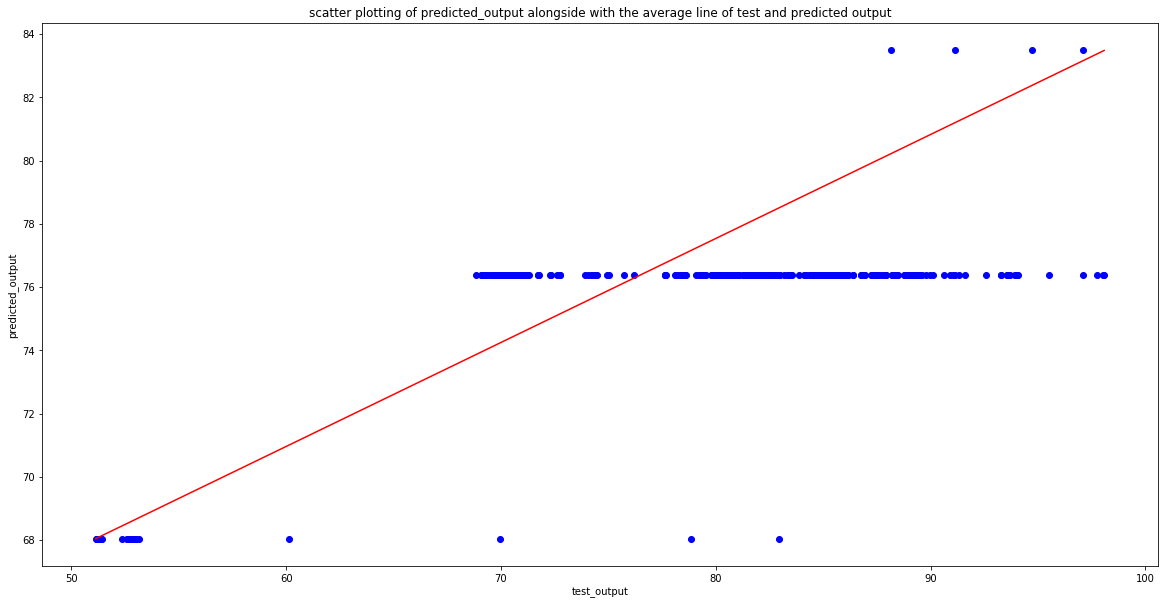

<class 'numpy.ndarray'>


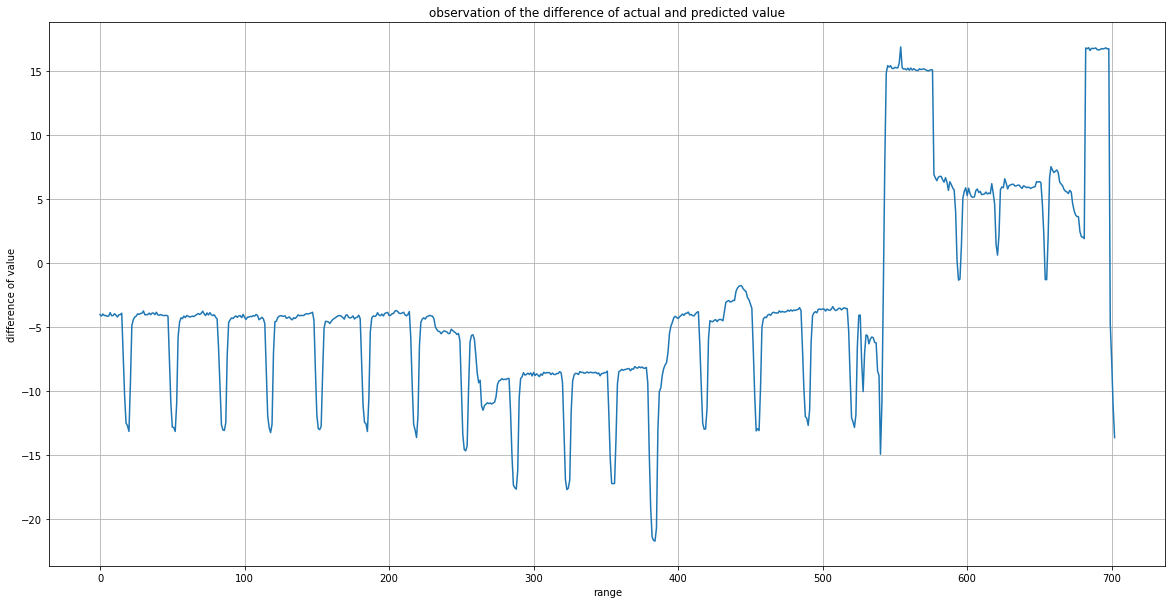

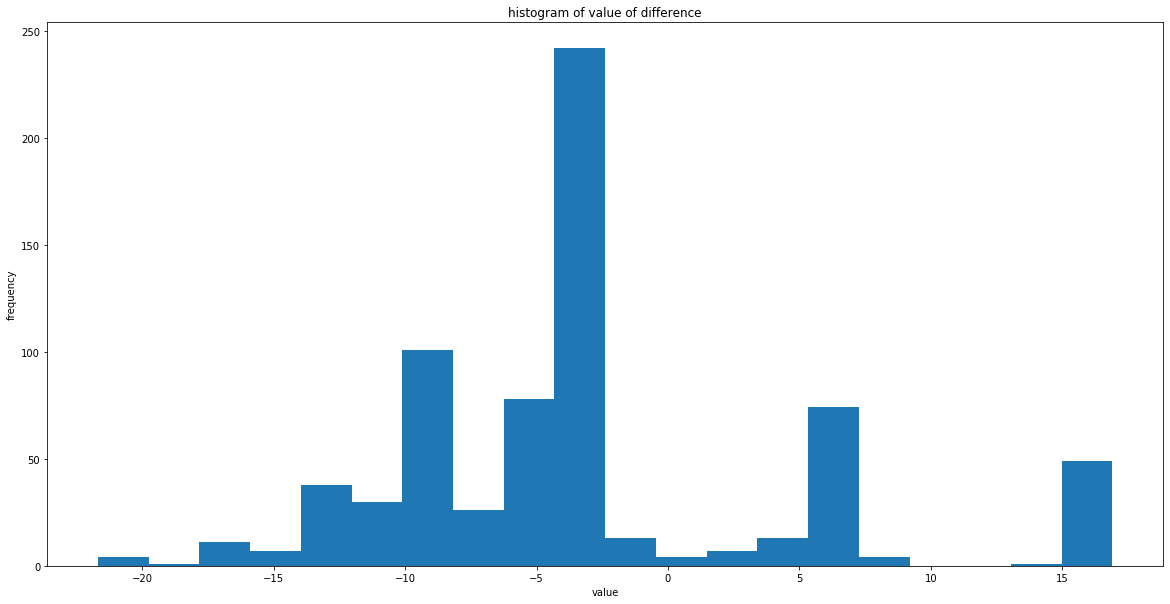

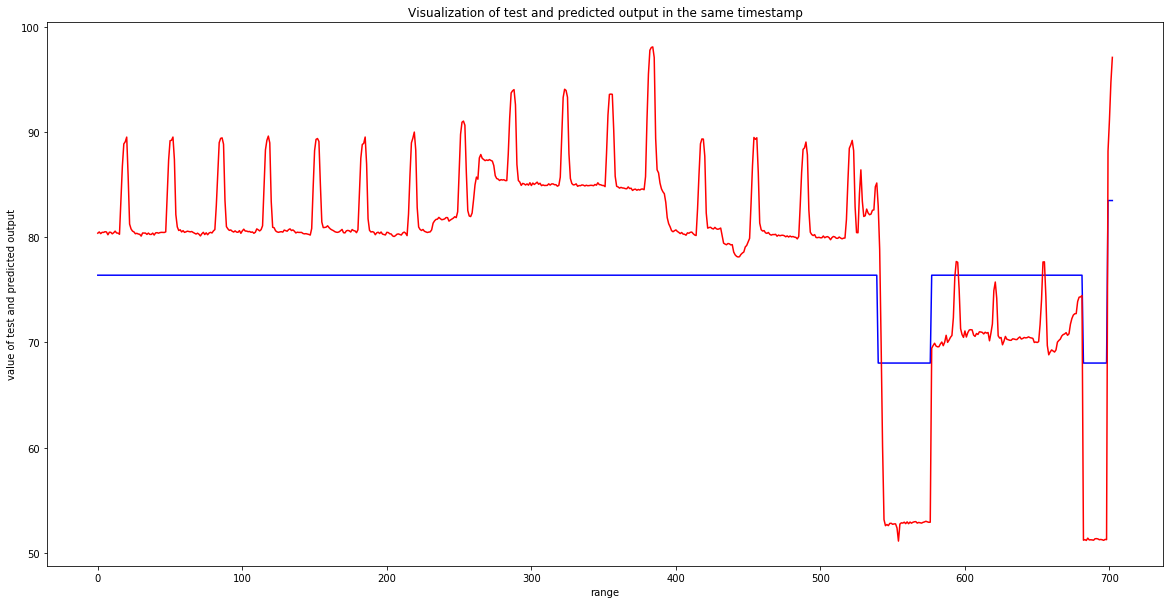

r_2 statistic: 0.20
Mean_absolute_error: 7.12
Mean squared error: 67.84
RMSE:  8.23639835560121
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


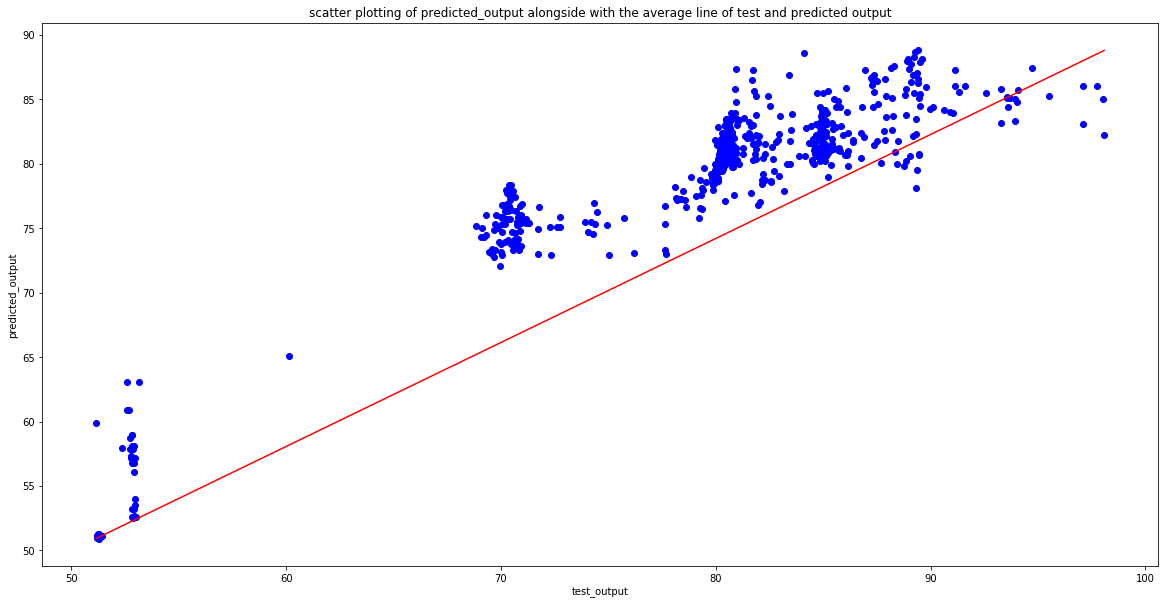

<class 'numpy.ndarray'>


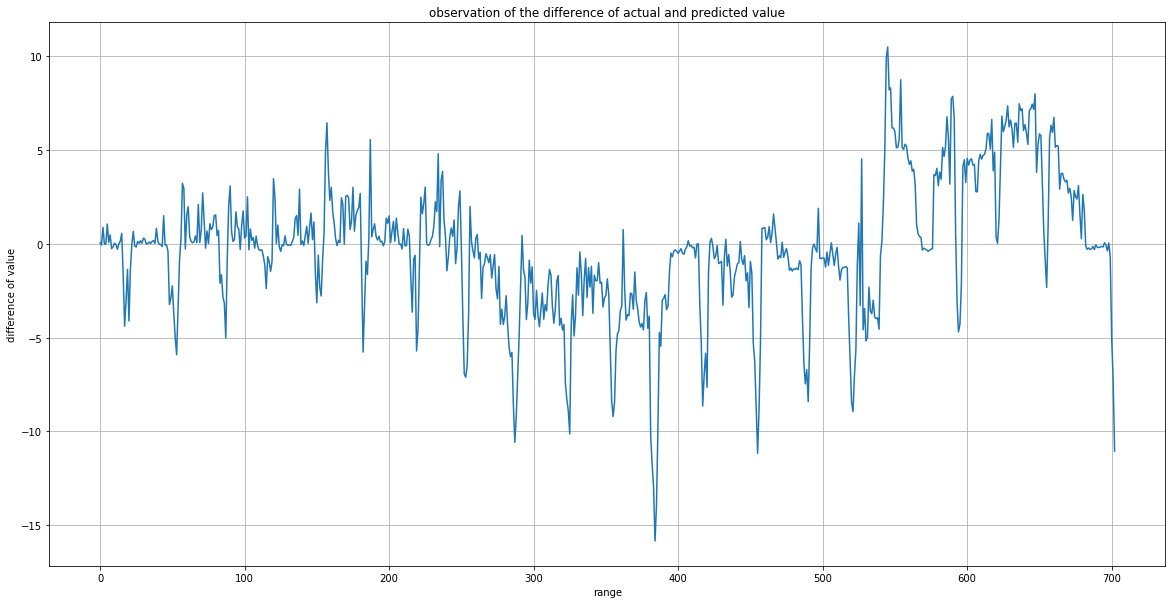

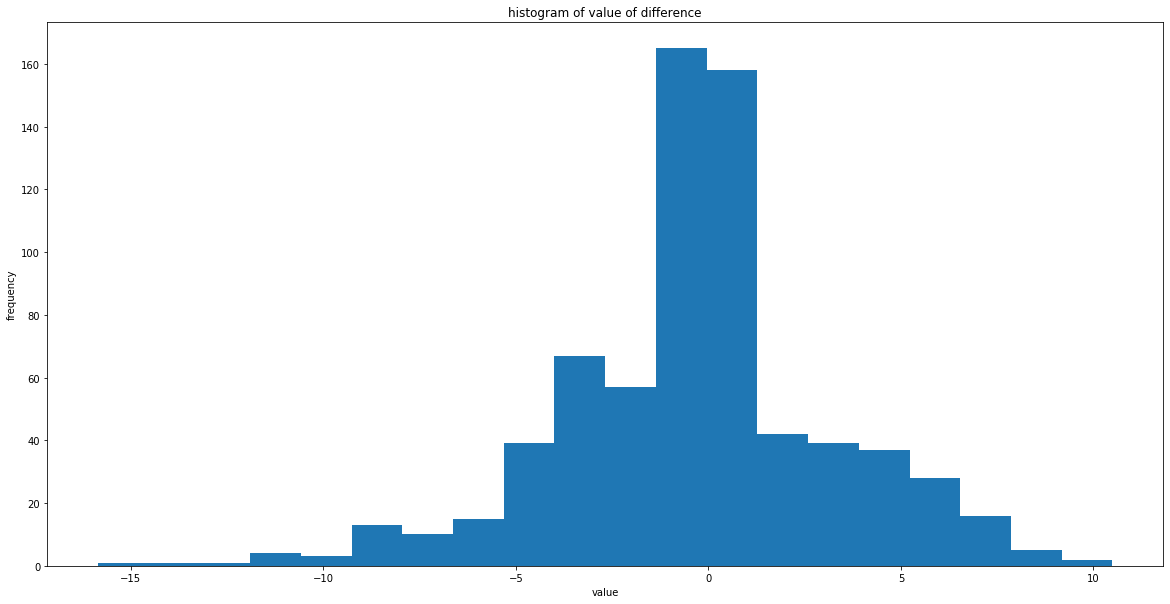

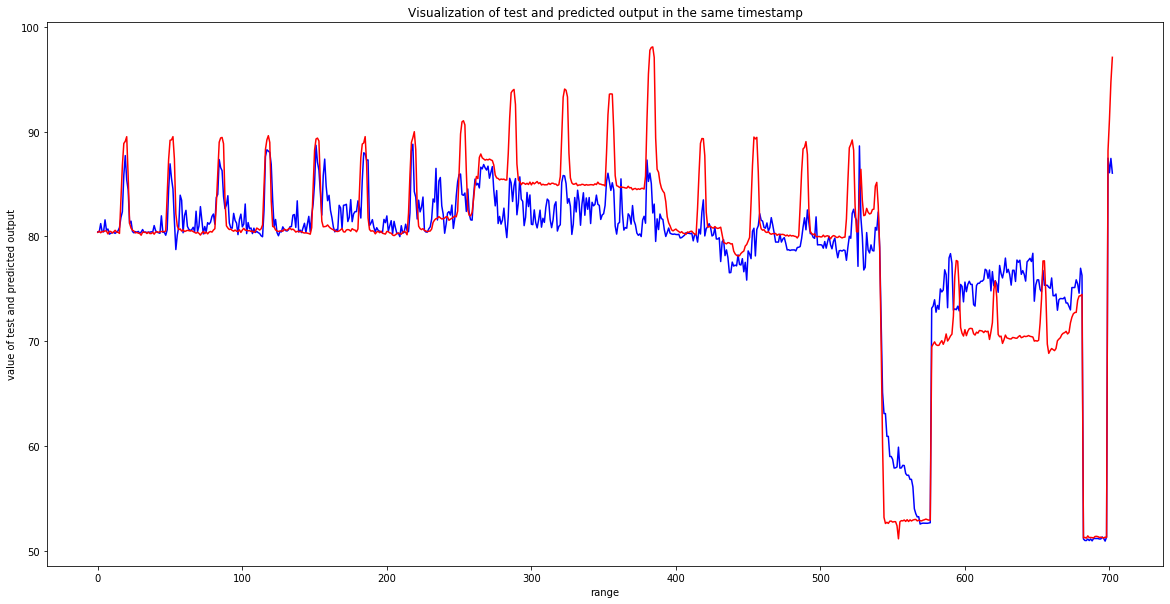

r_2 statistic: 0.85
Mean_absolute_error: 2.53
Mean squared error: 12.91
RMSE:  3.5933778028593593
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

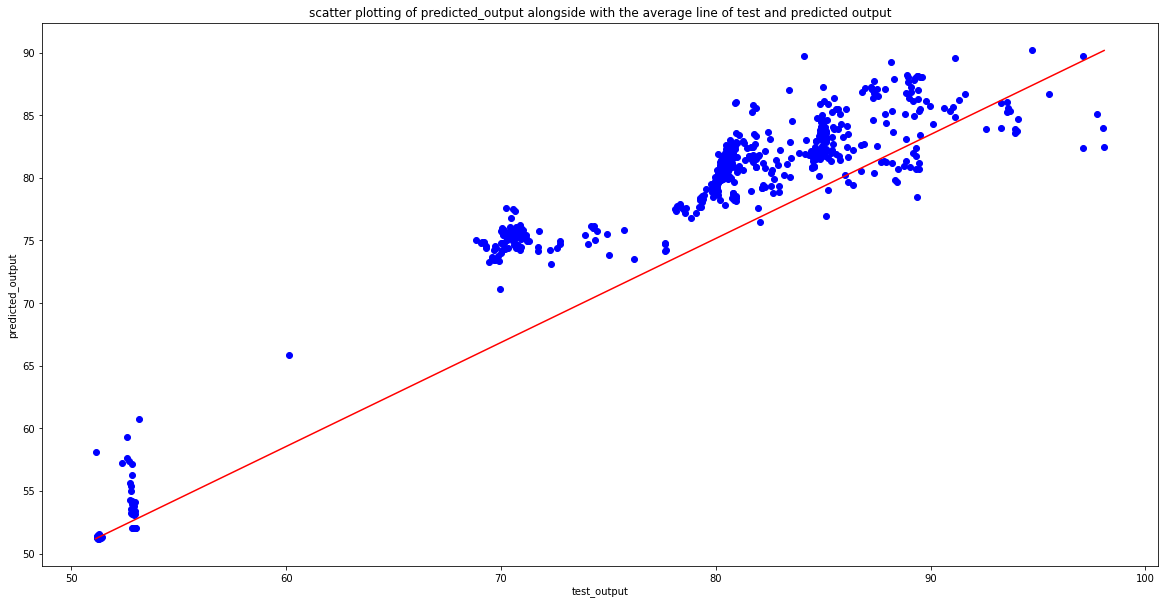

<class 'numpy.ndarray'>


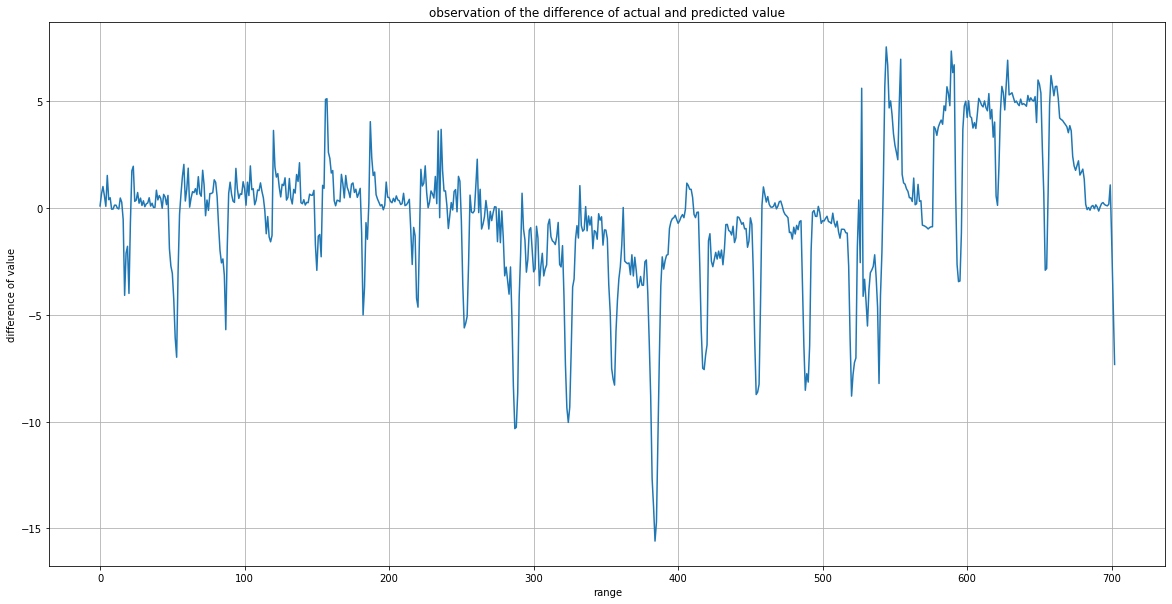

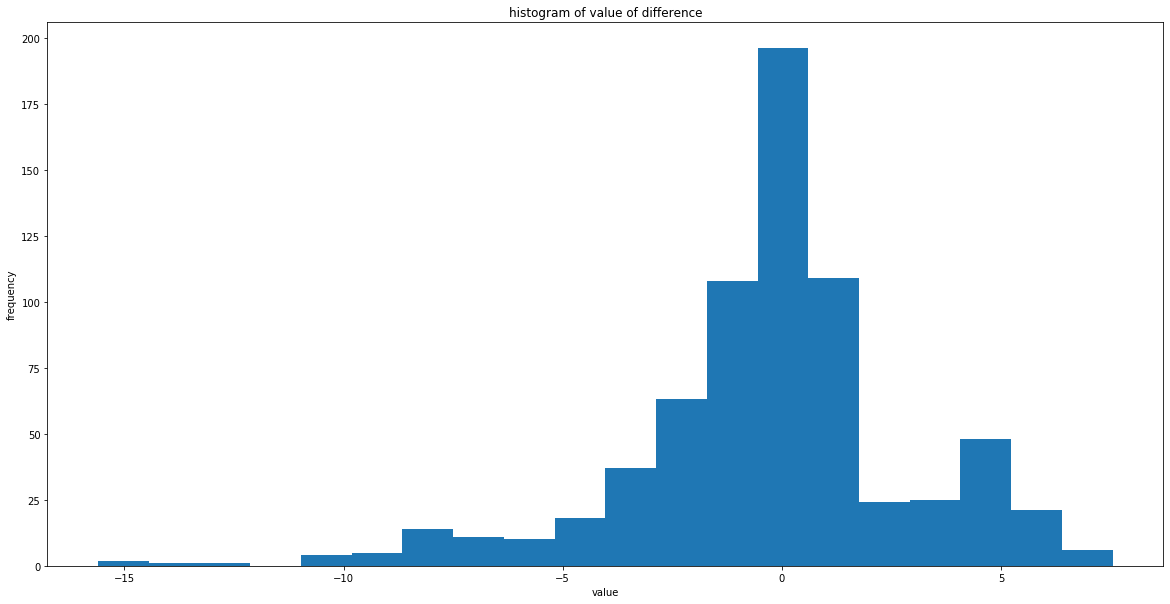

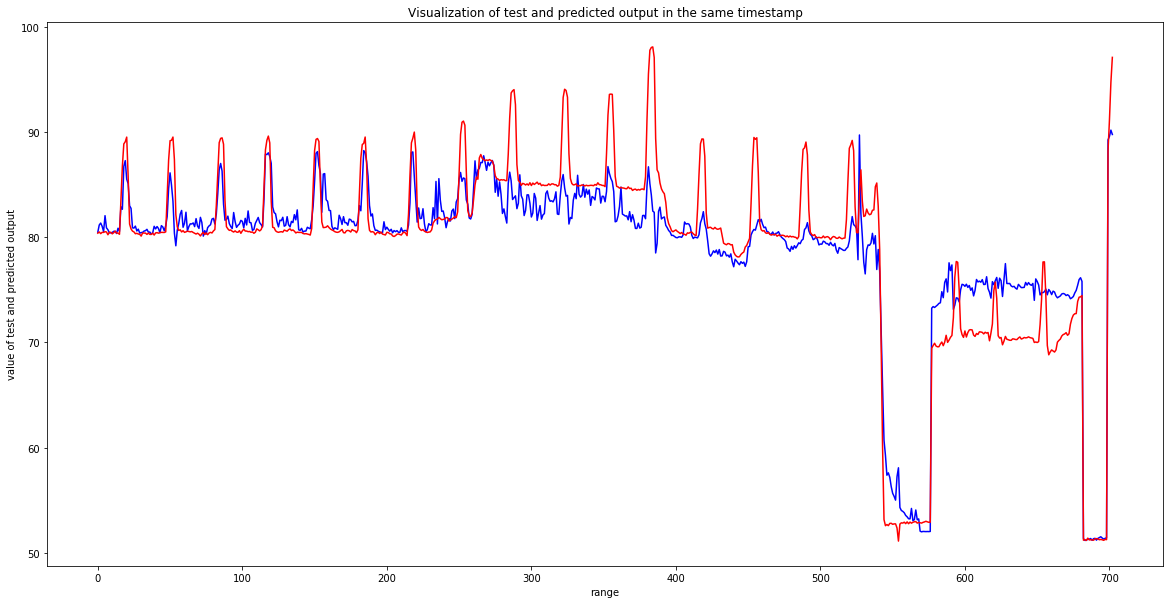

r_2 statistic: 0.88
Mean_absolute_error: 2.21
Mean squared error: 10.47
RMSE:  3.2351950641933986
!!!!---------------!!!!----------------!!!!
------- GBR


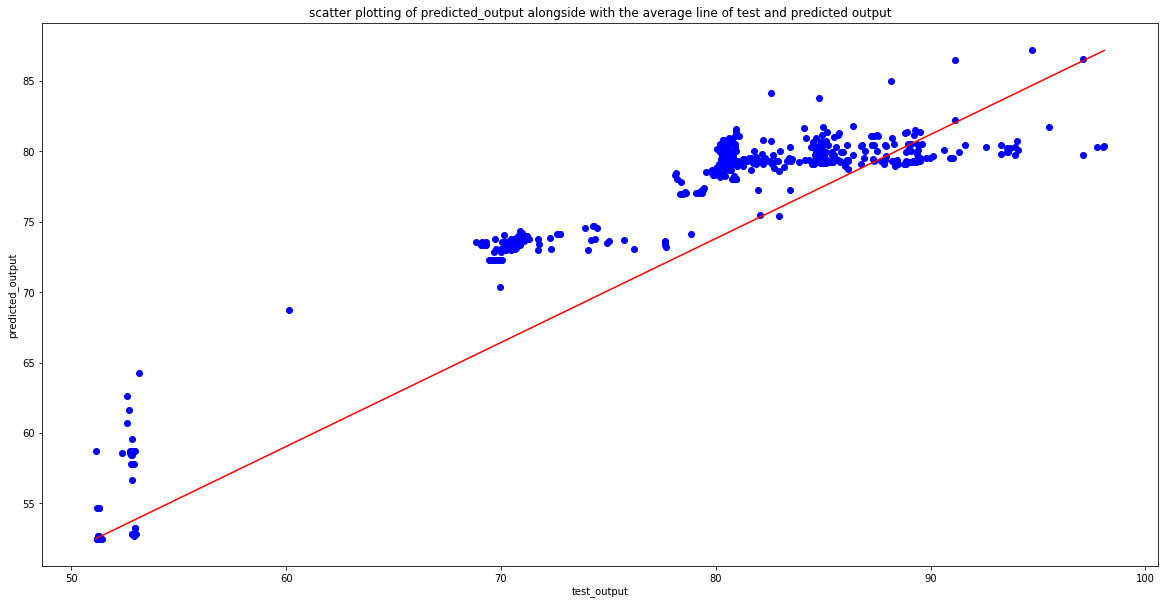

<class 'numpy.ndarray'>


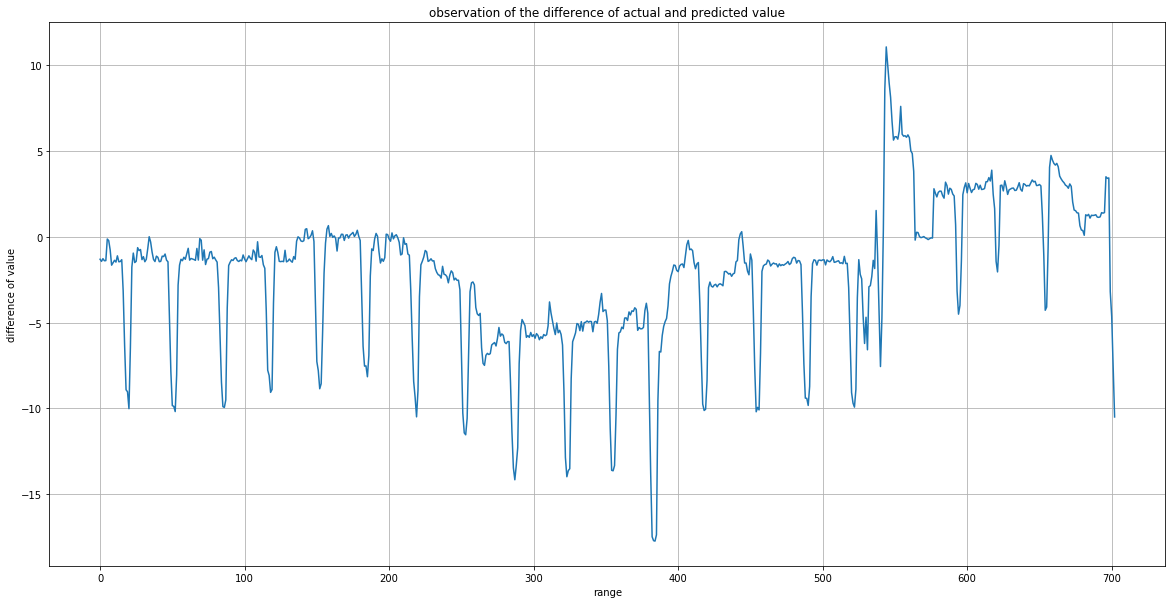

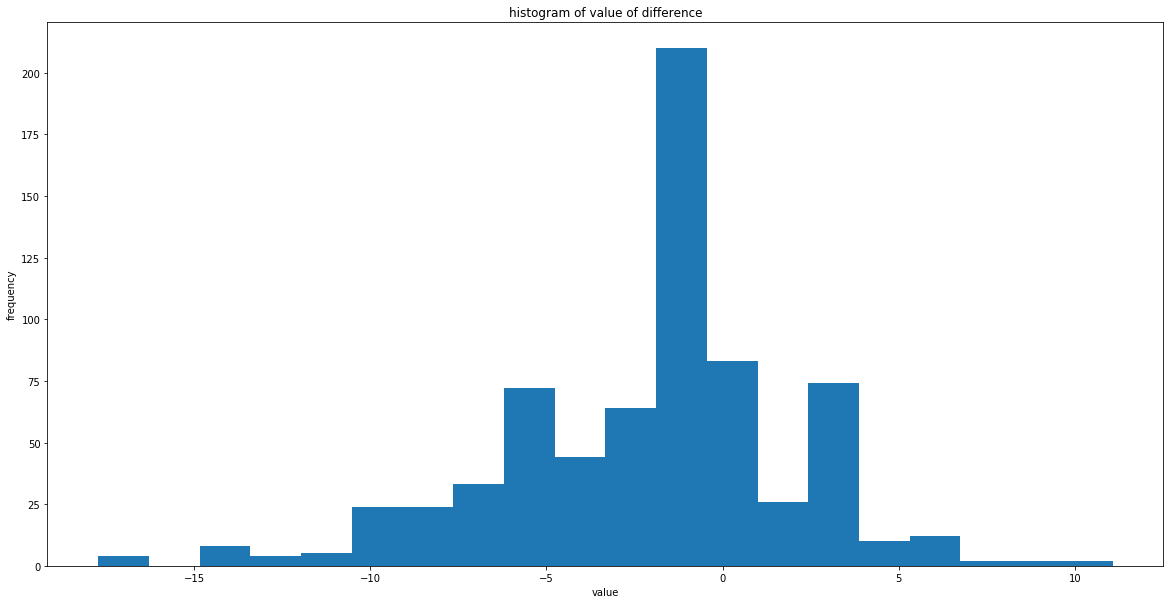

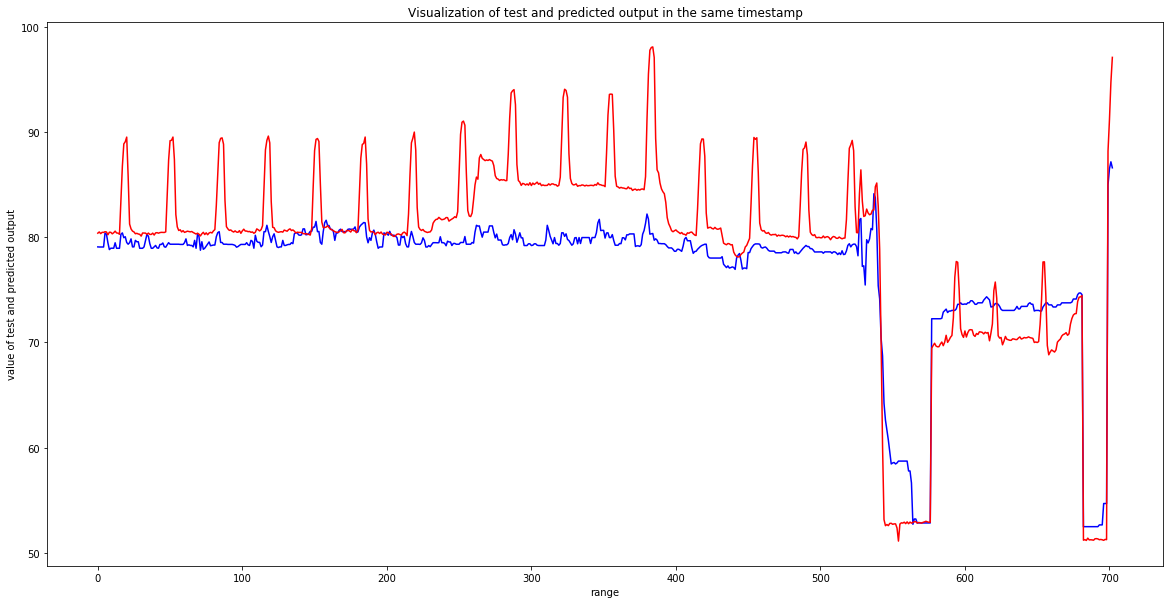

r_2 statistic: 0.74
Mean_absolute_error: 3.44
Mean squared error: 21.77
RMSE:  4.665791404136262
!!!!---------------!!!!----------------!!!!


In [58]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

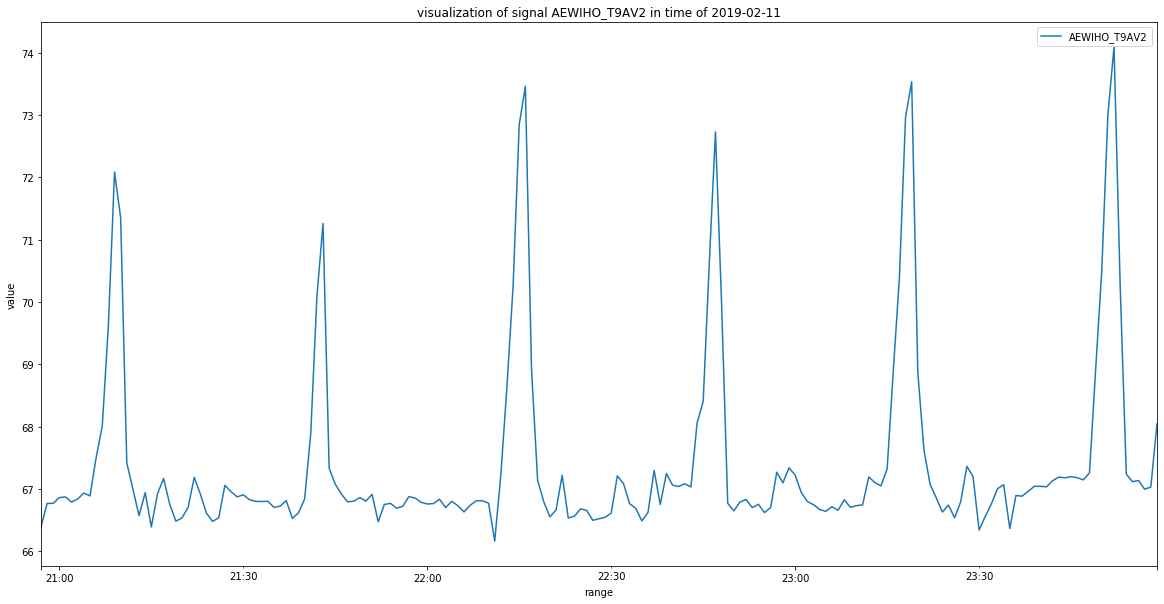

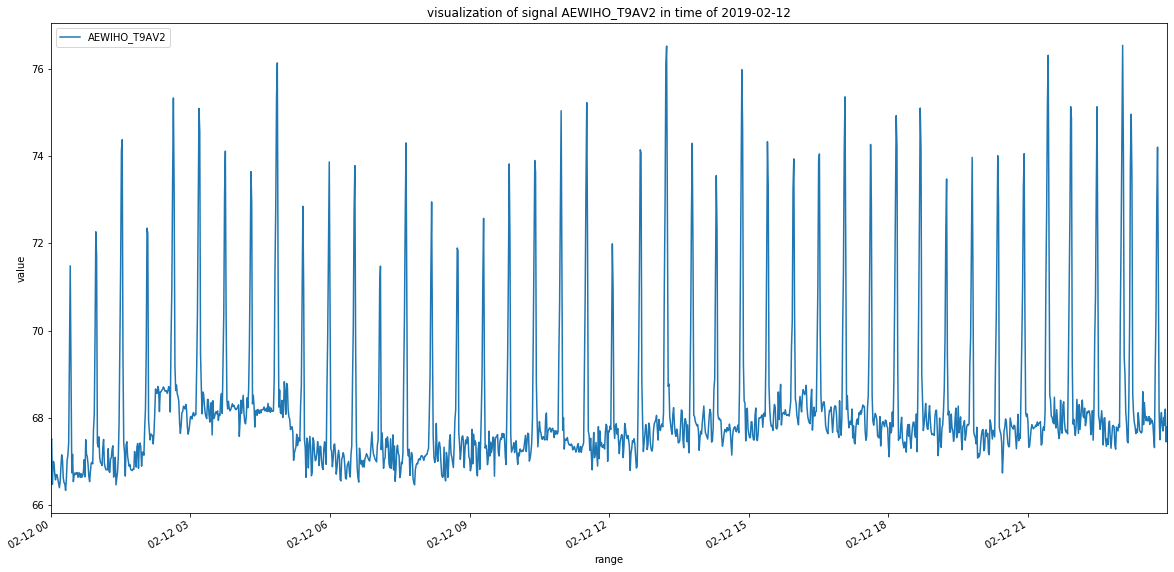

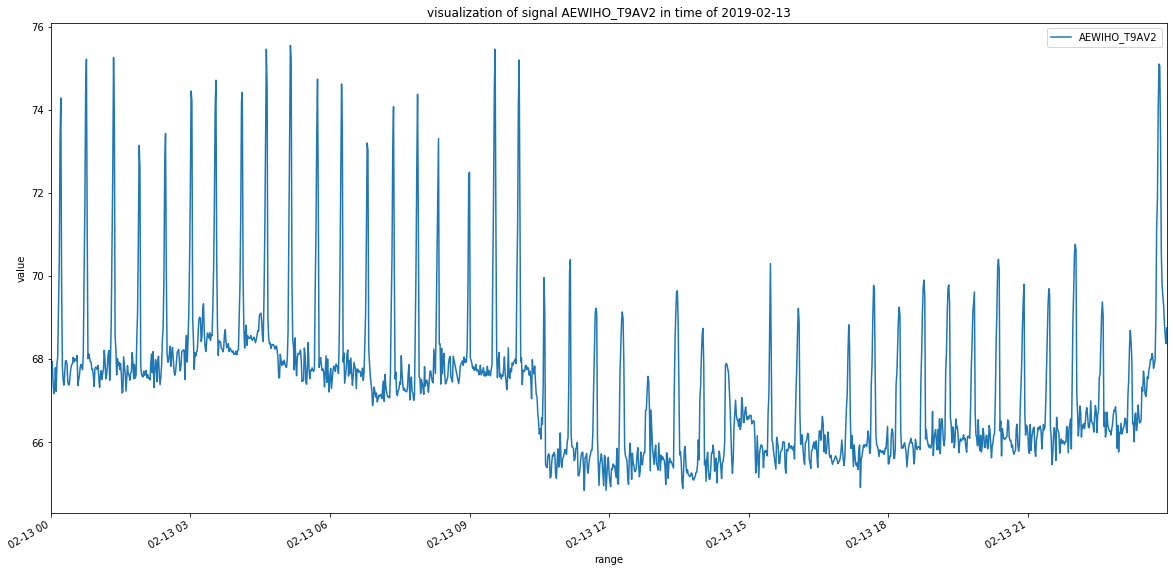

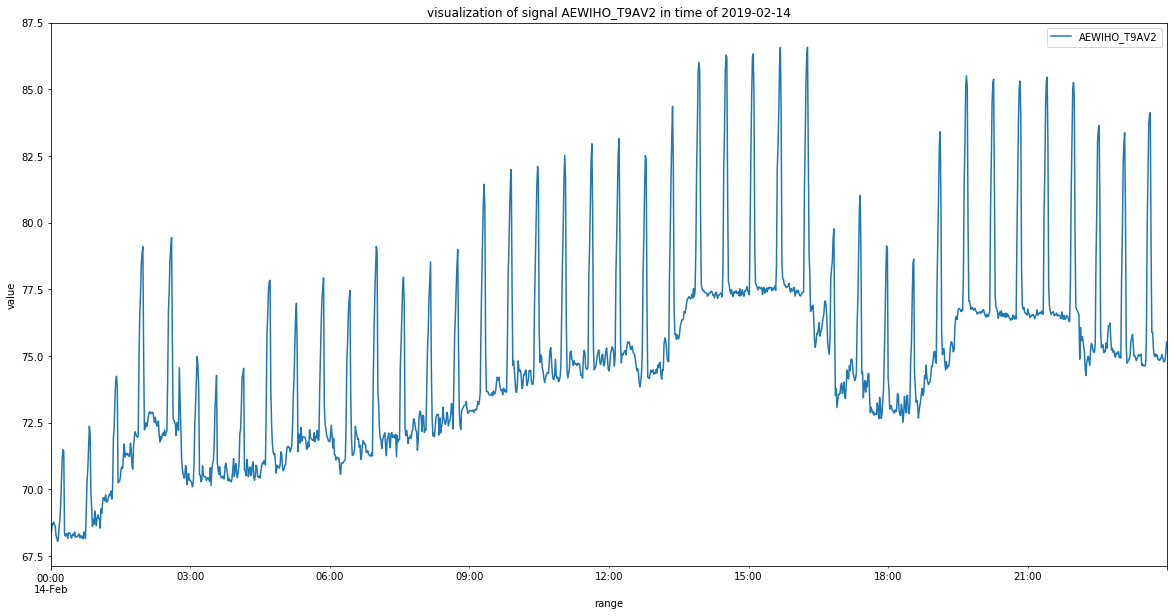

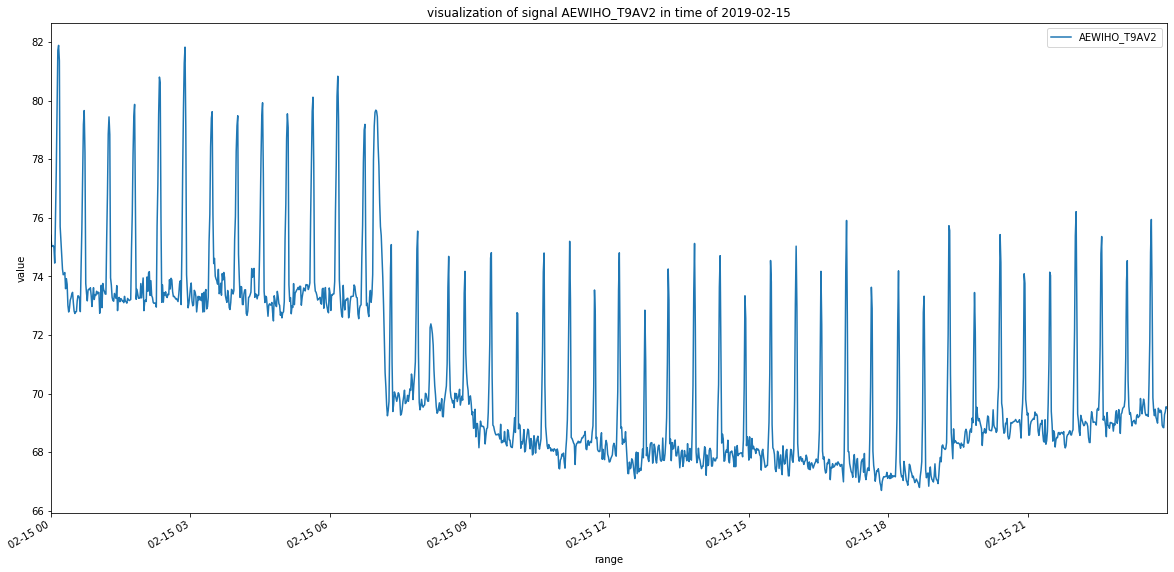

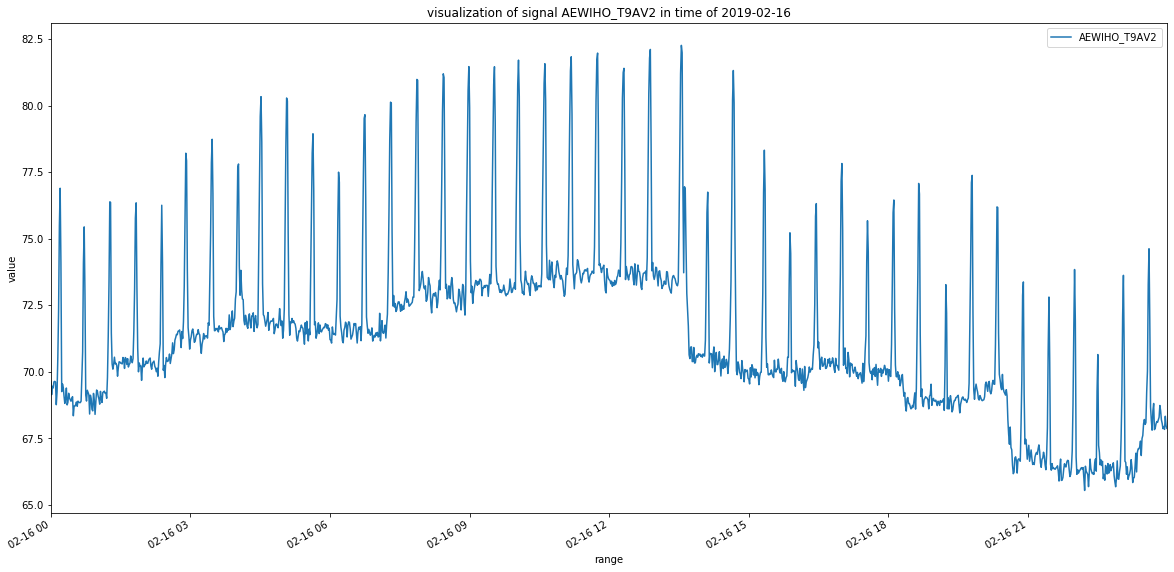

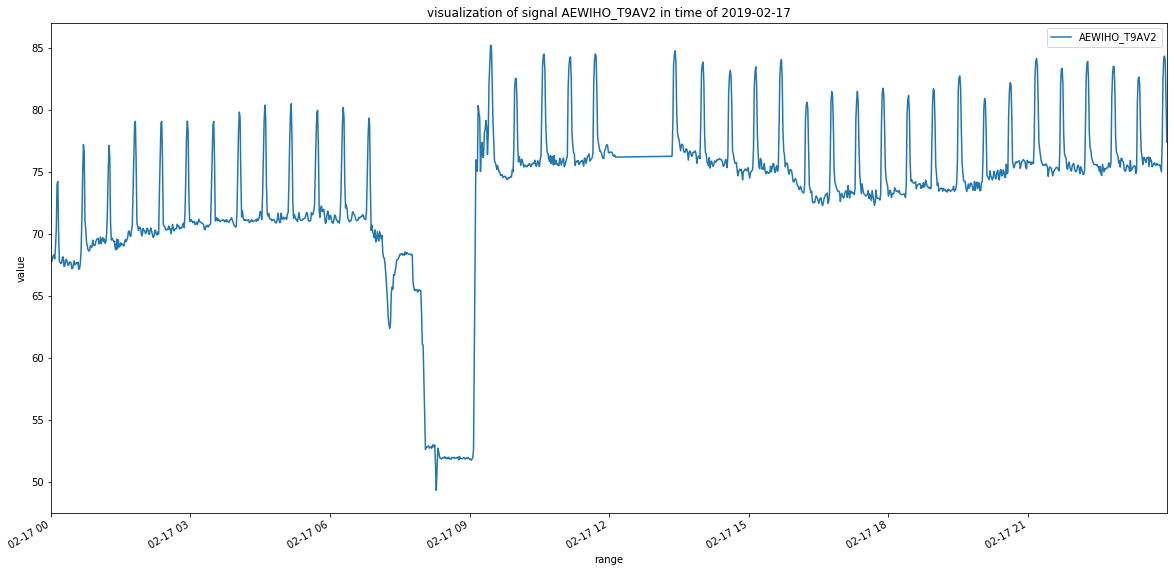

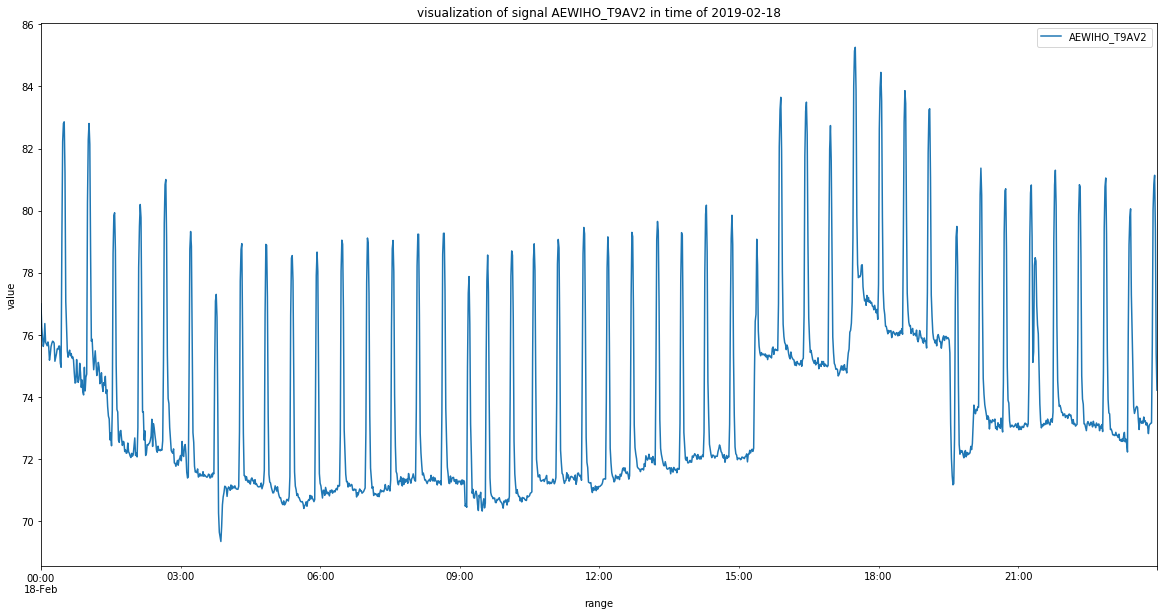

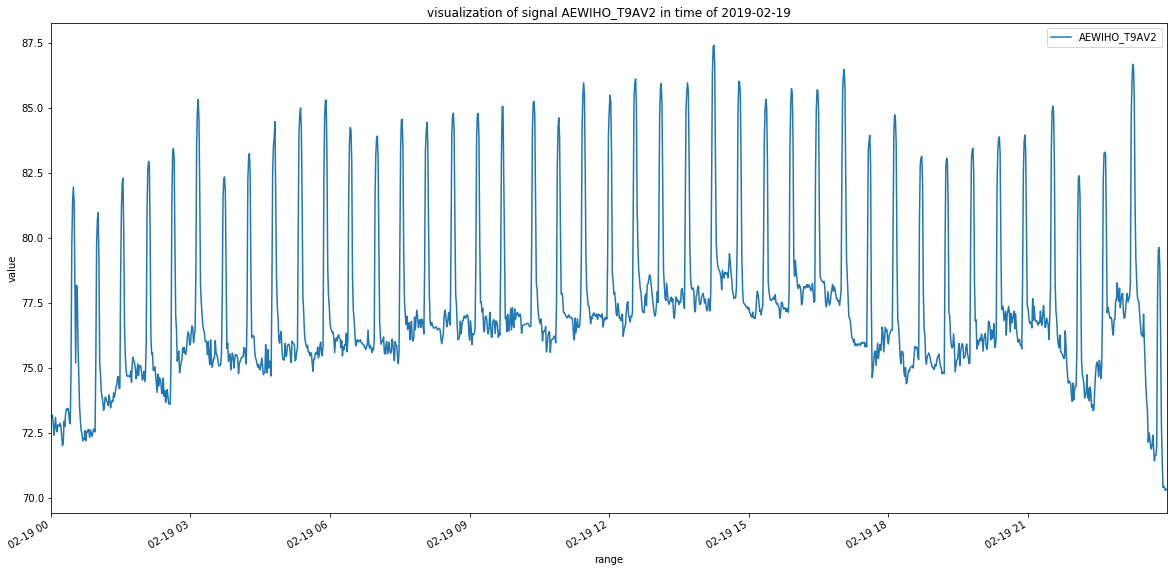

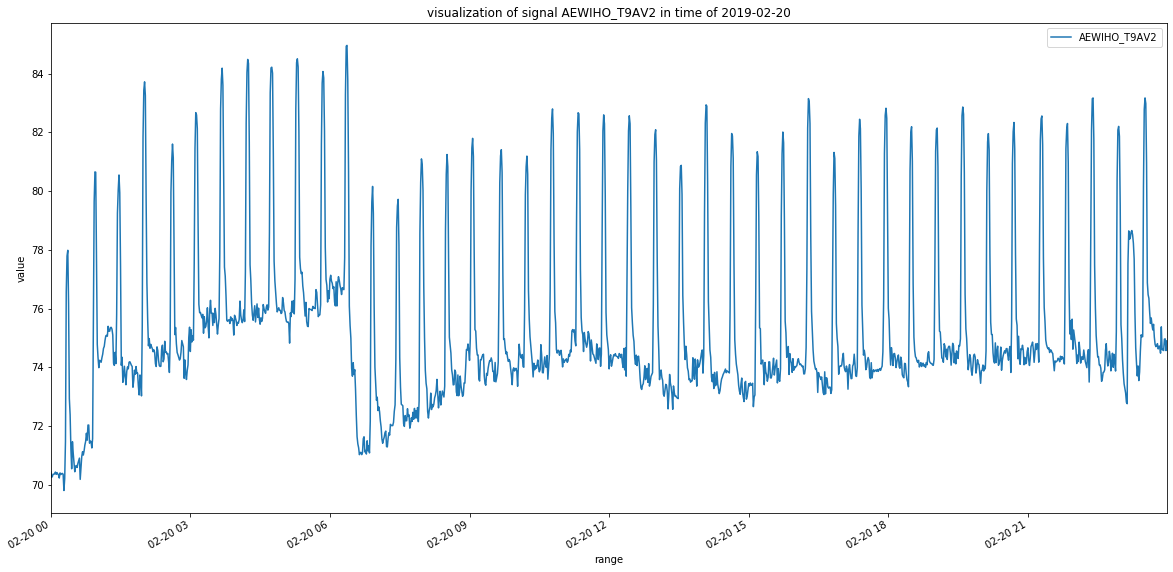

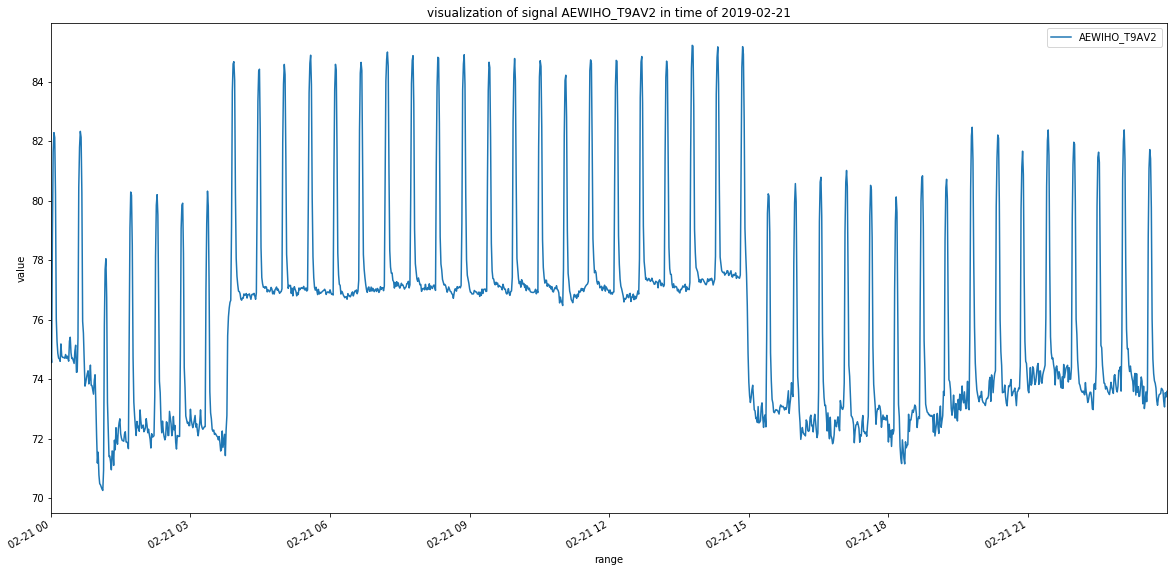

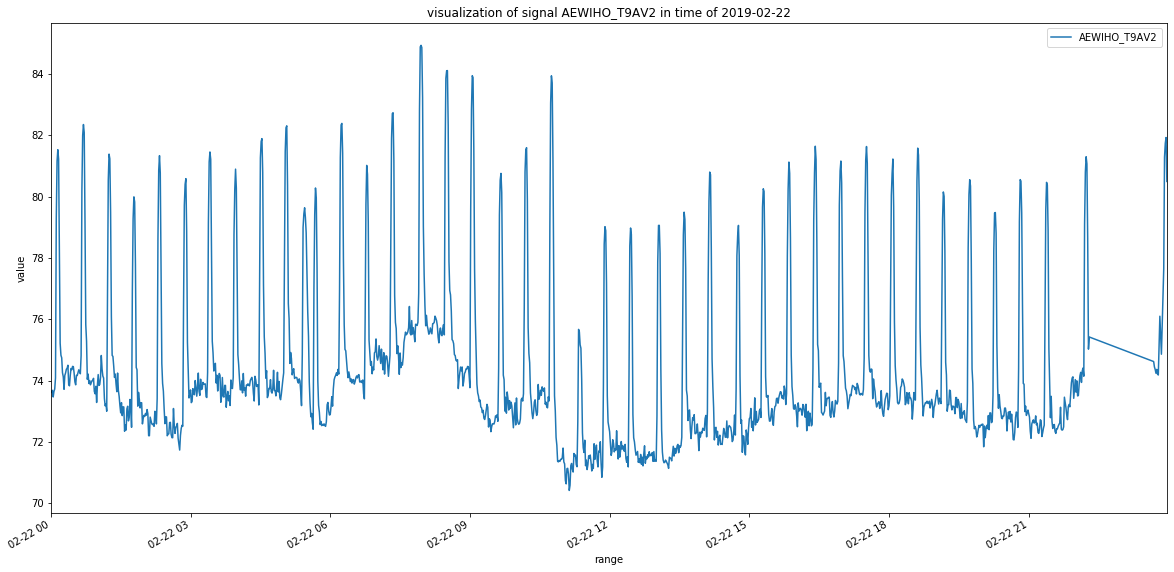

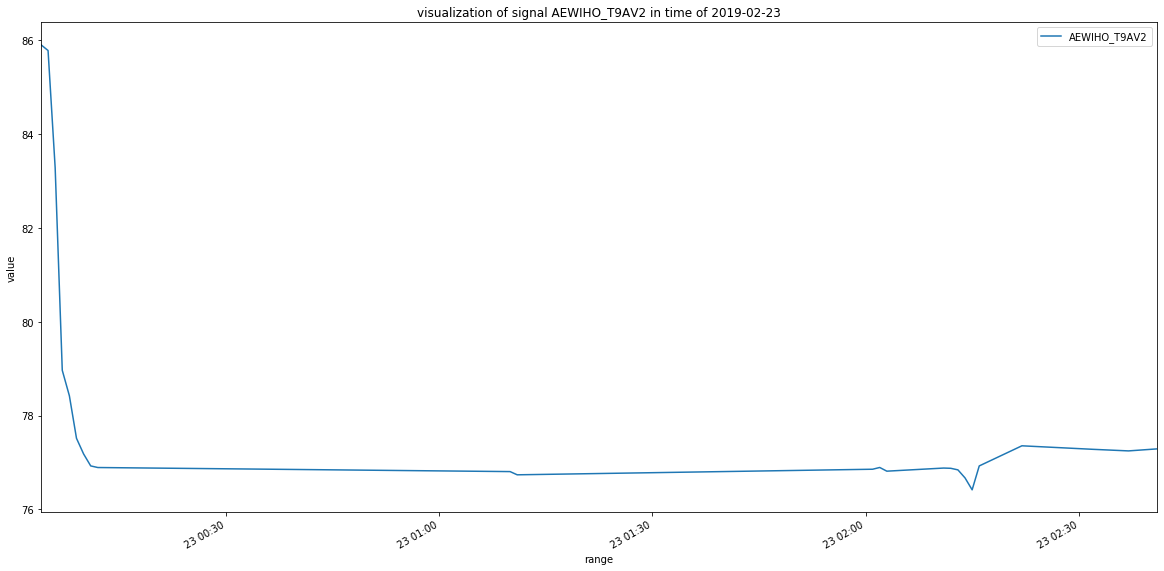

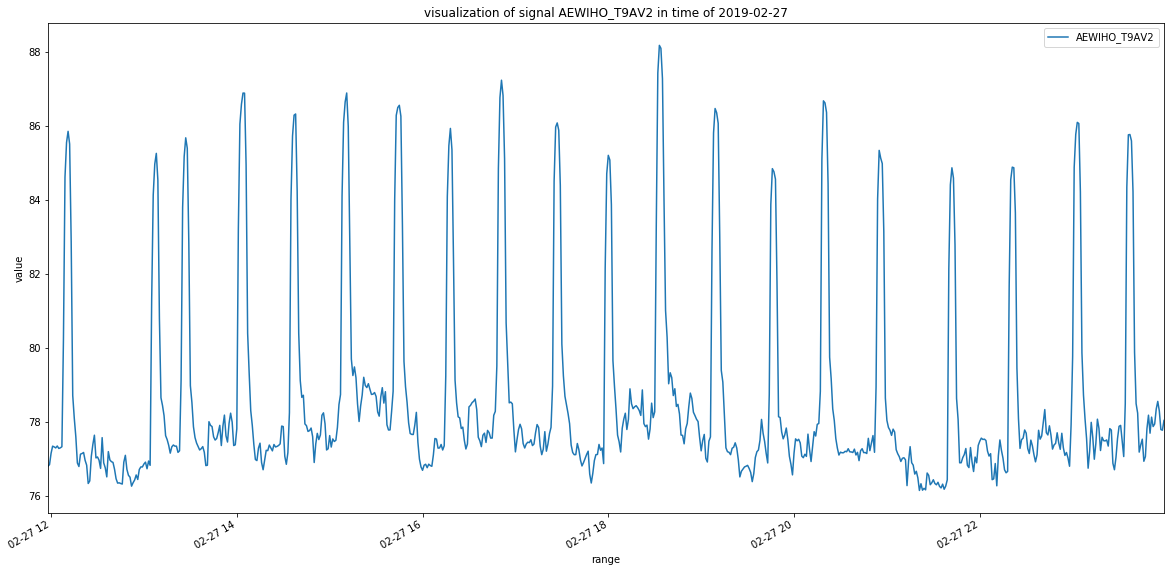

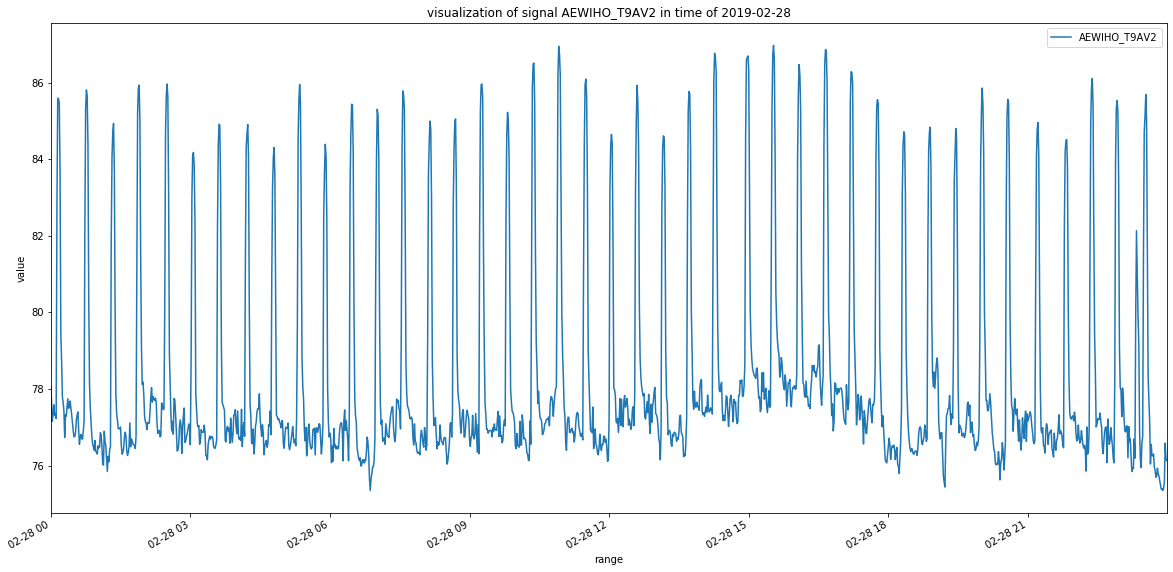

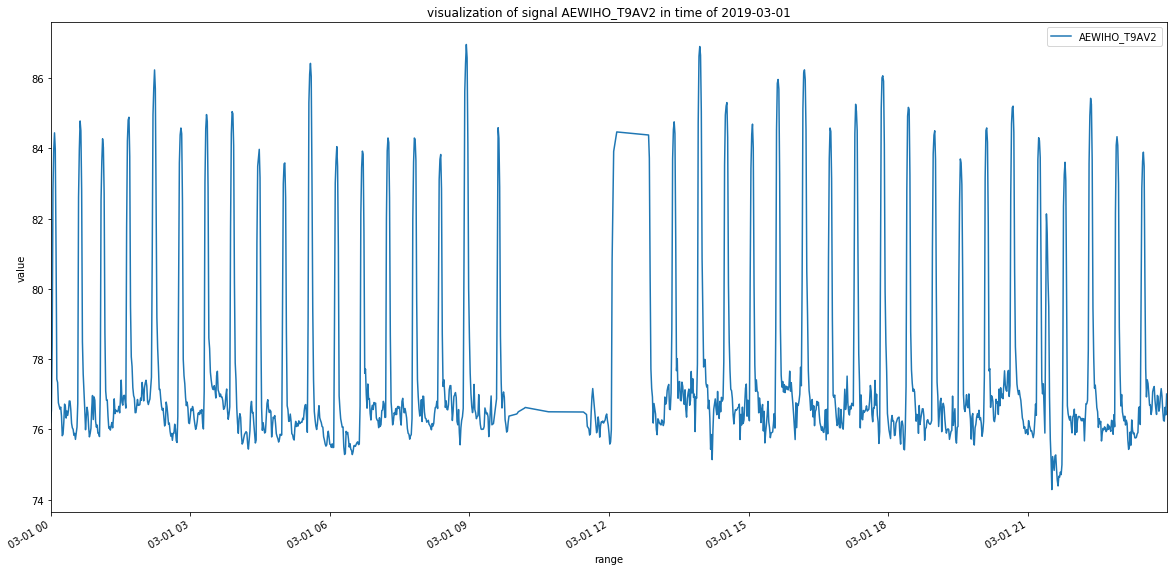

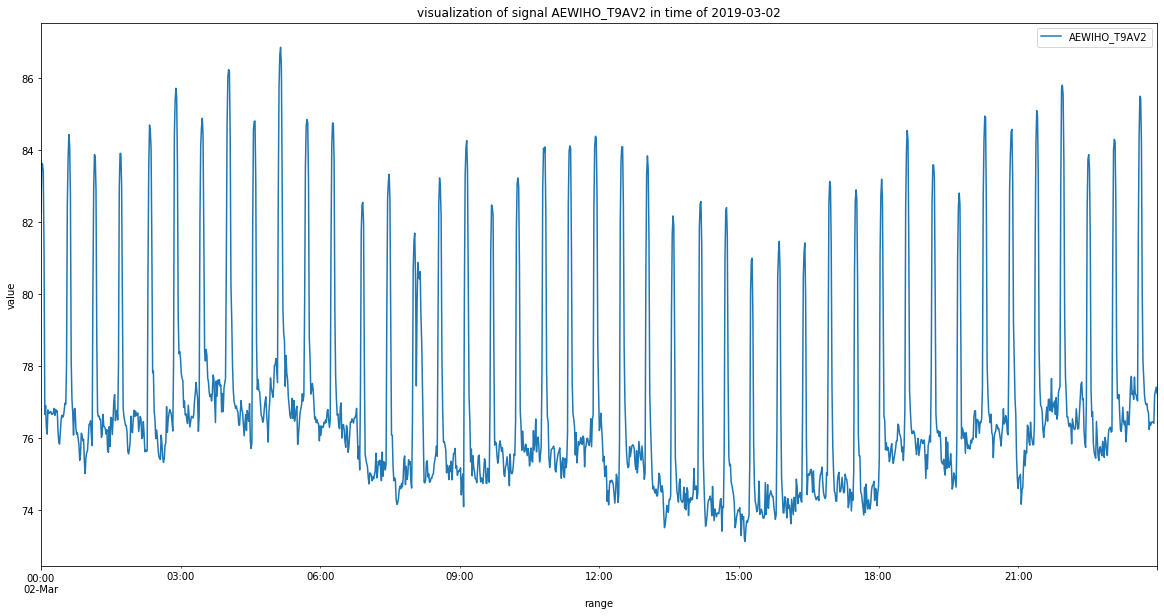

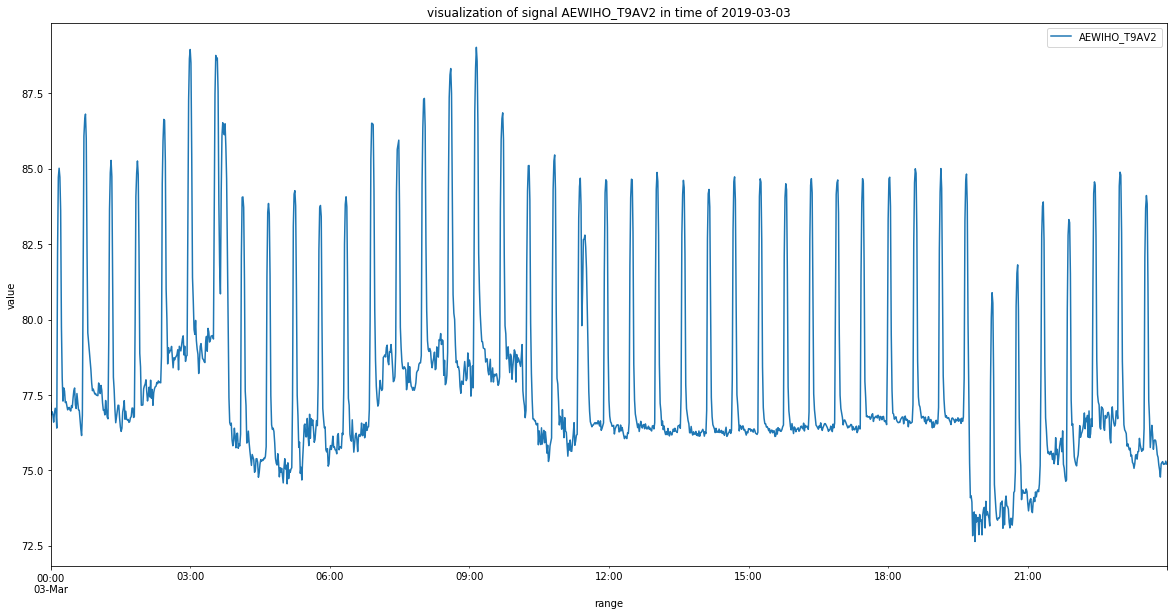

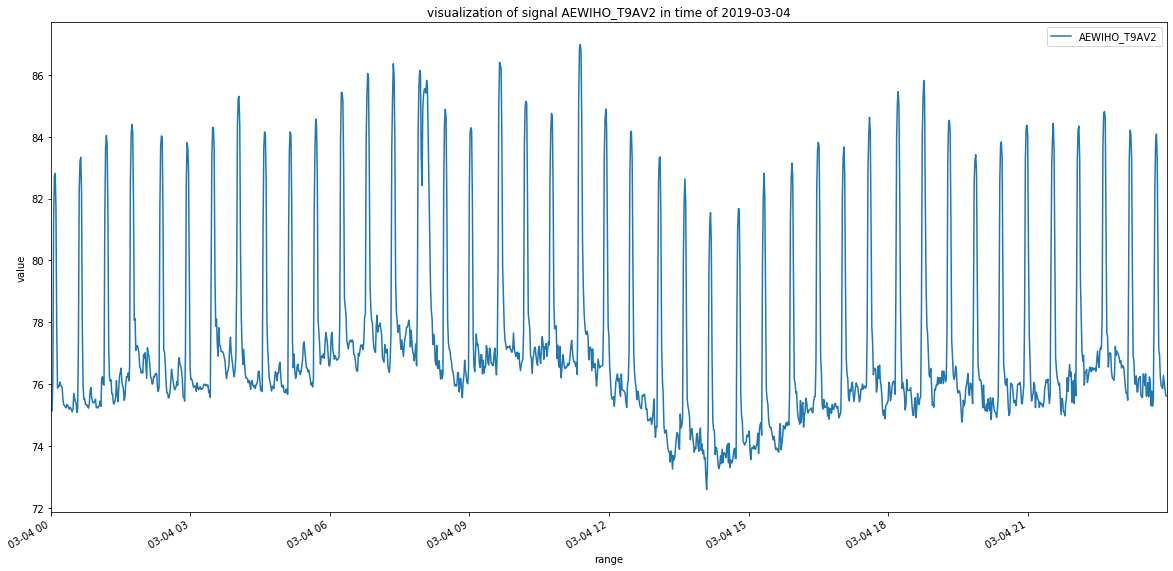

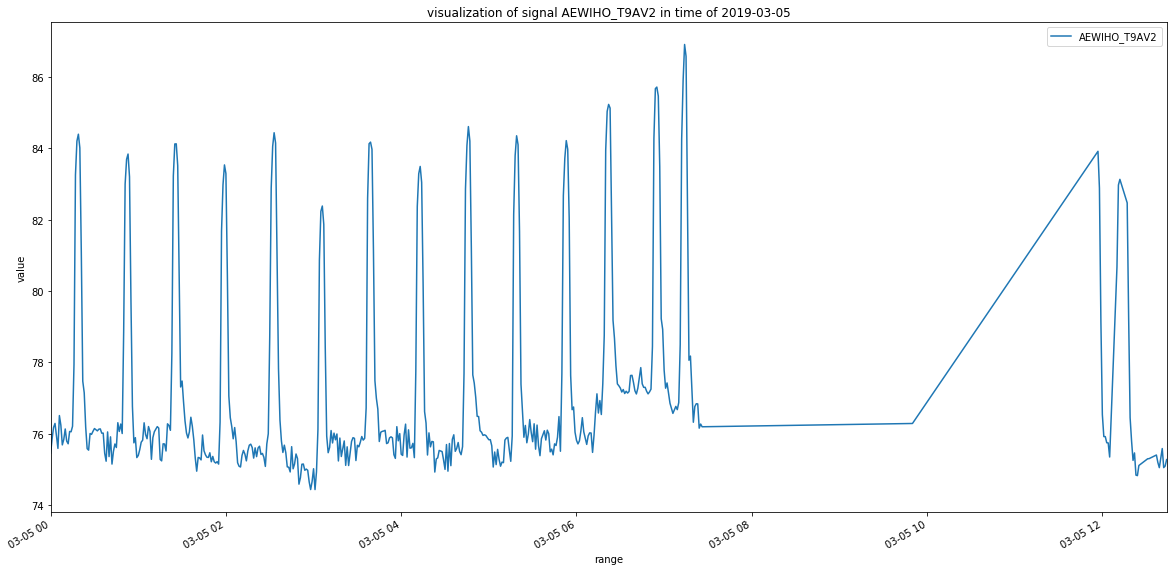

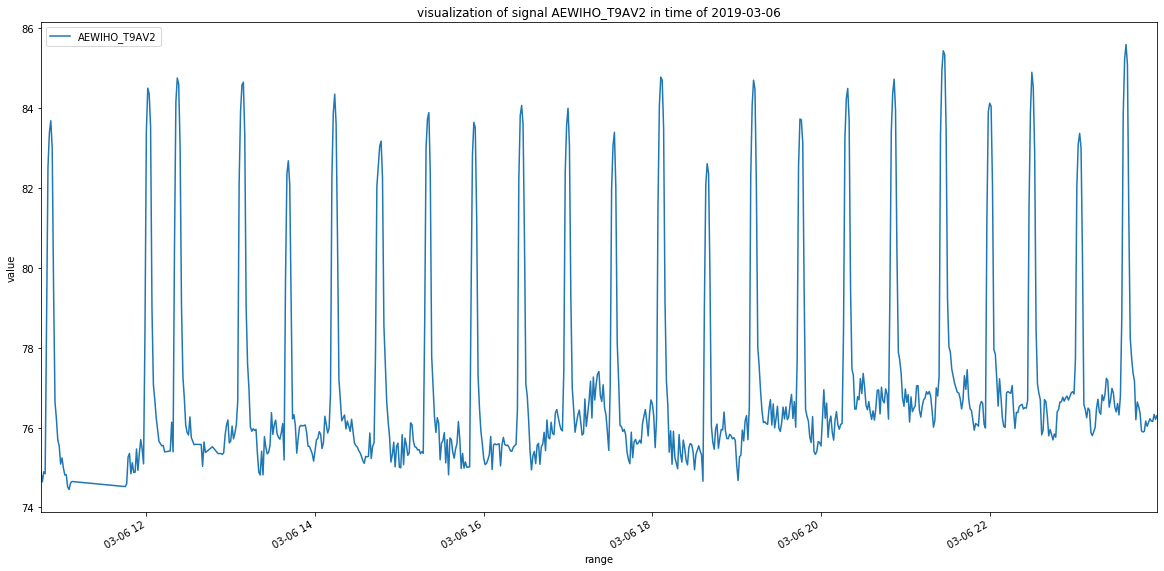

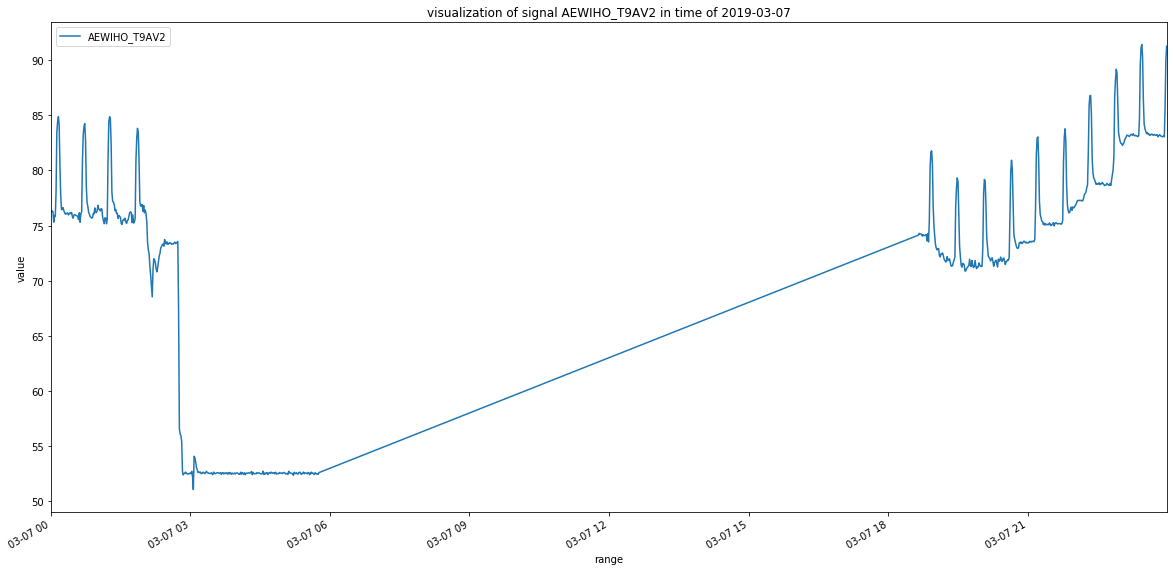

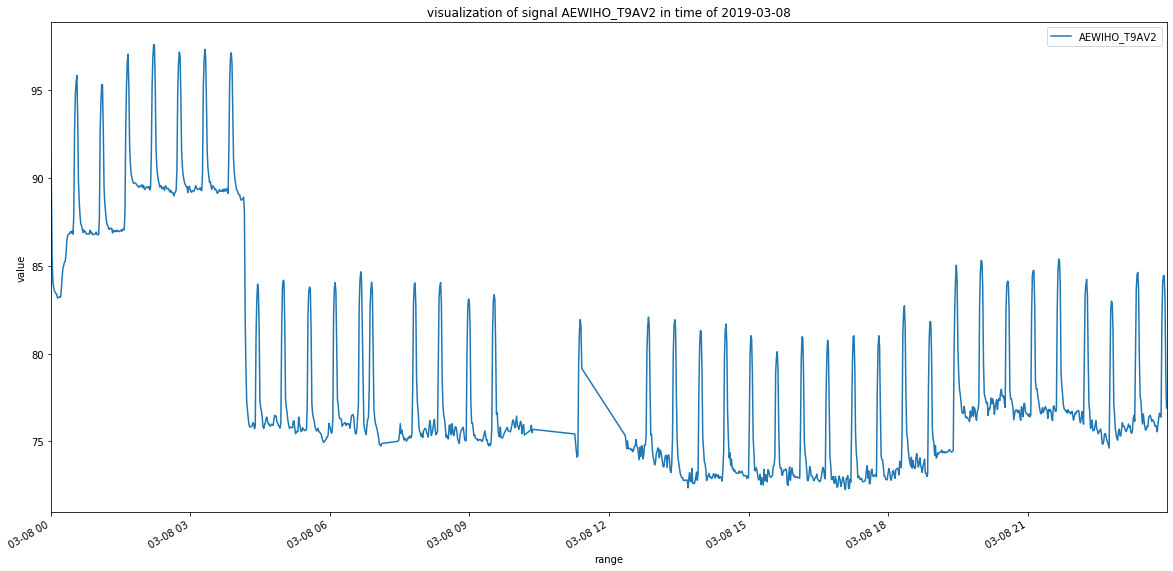

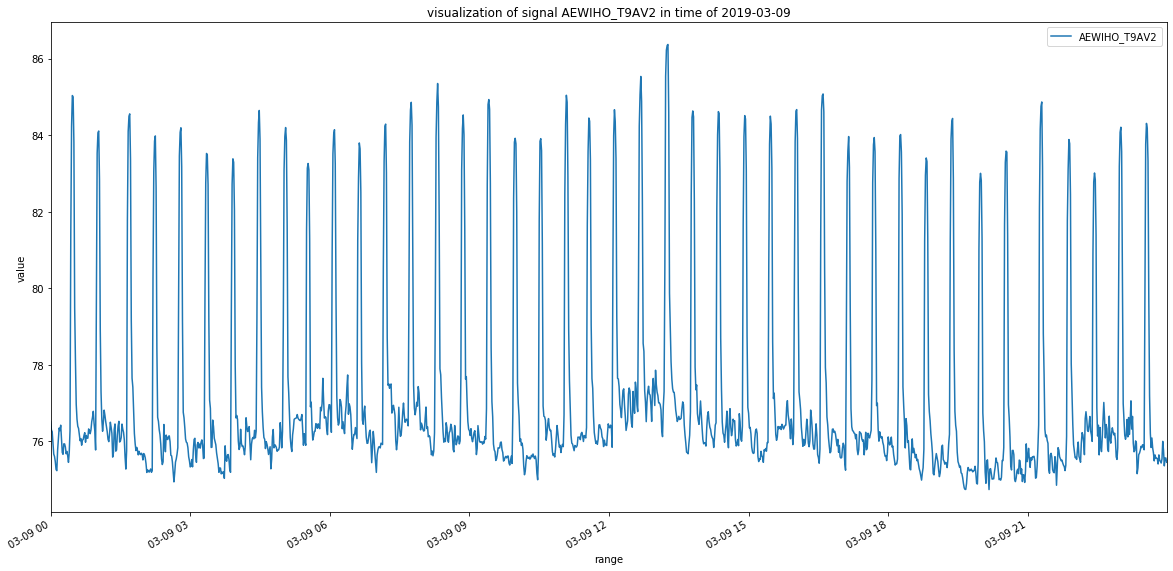

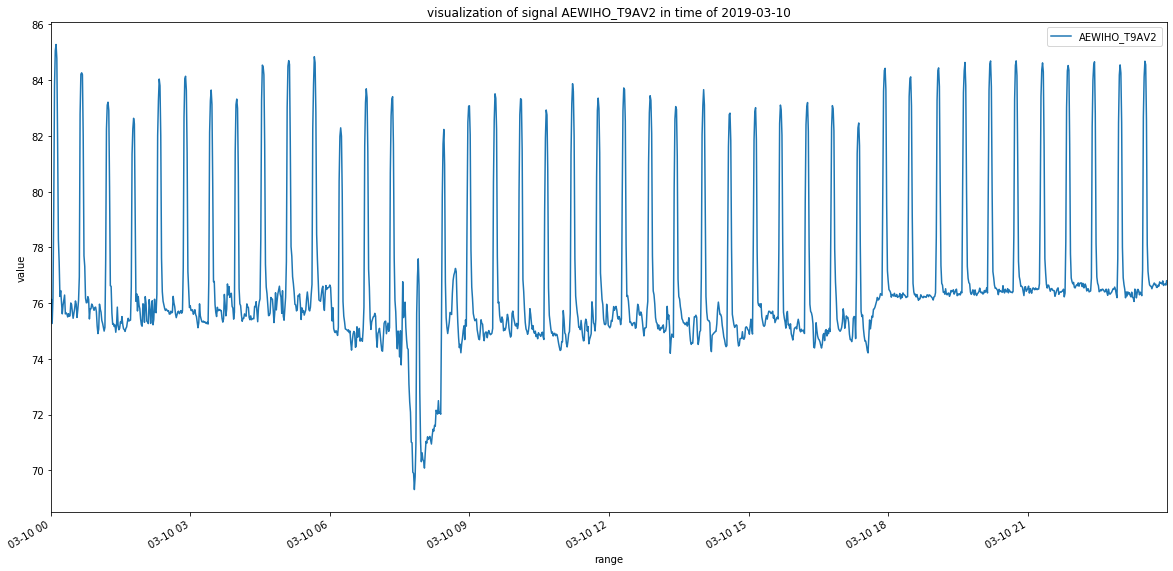

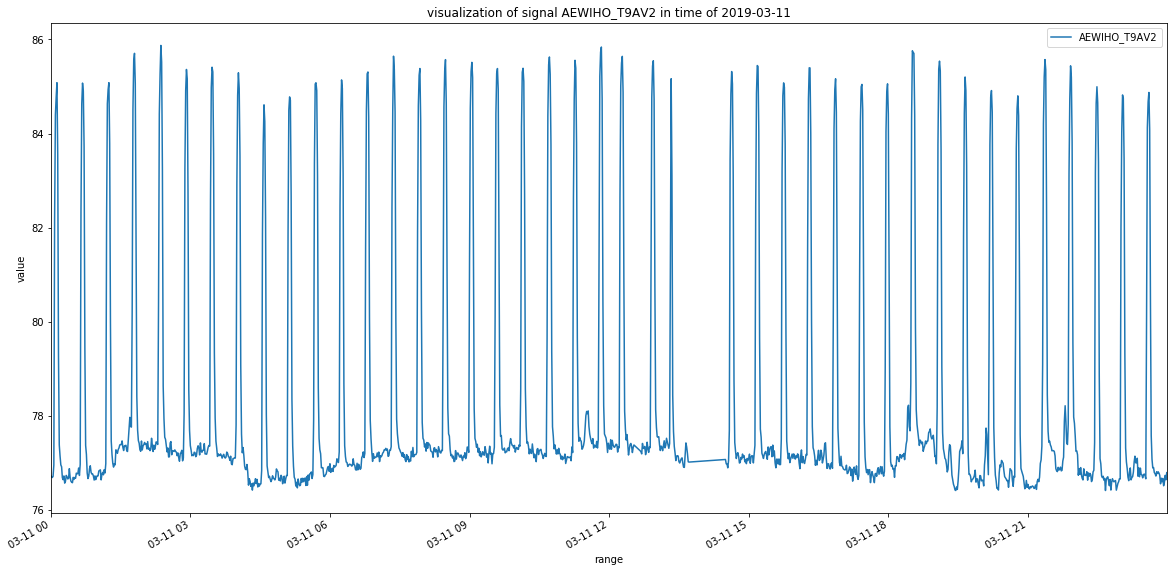

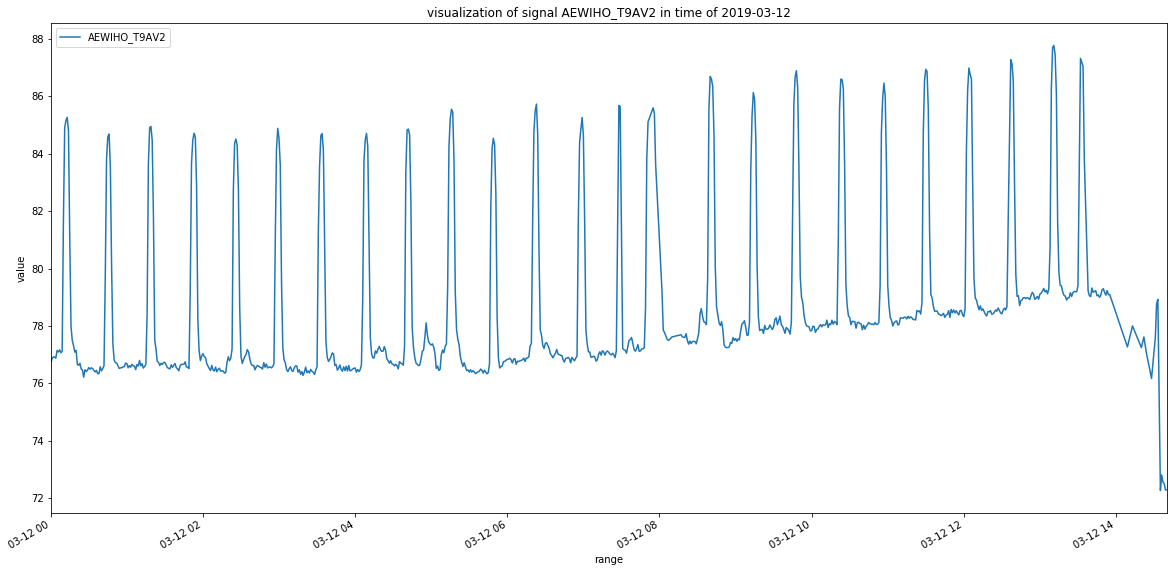

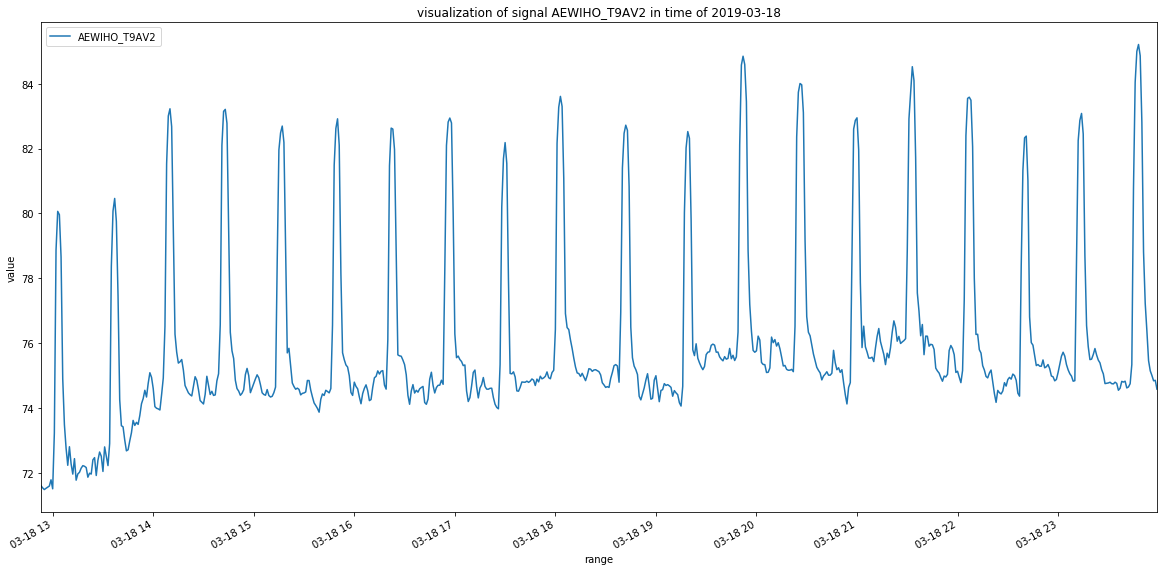

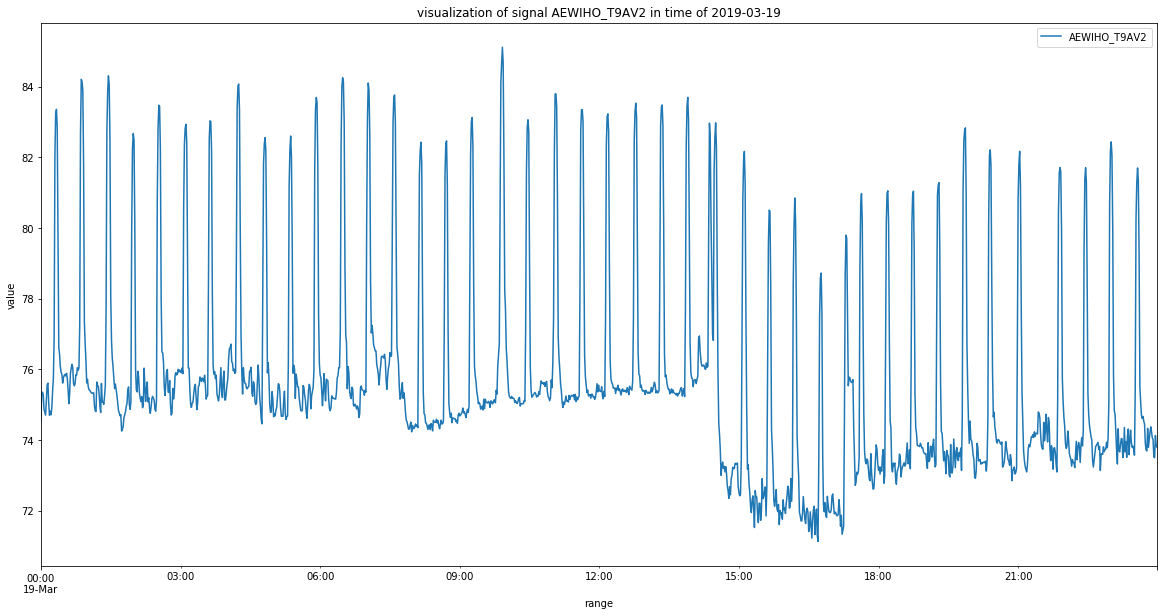

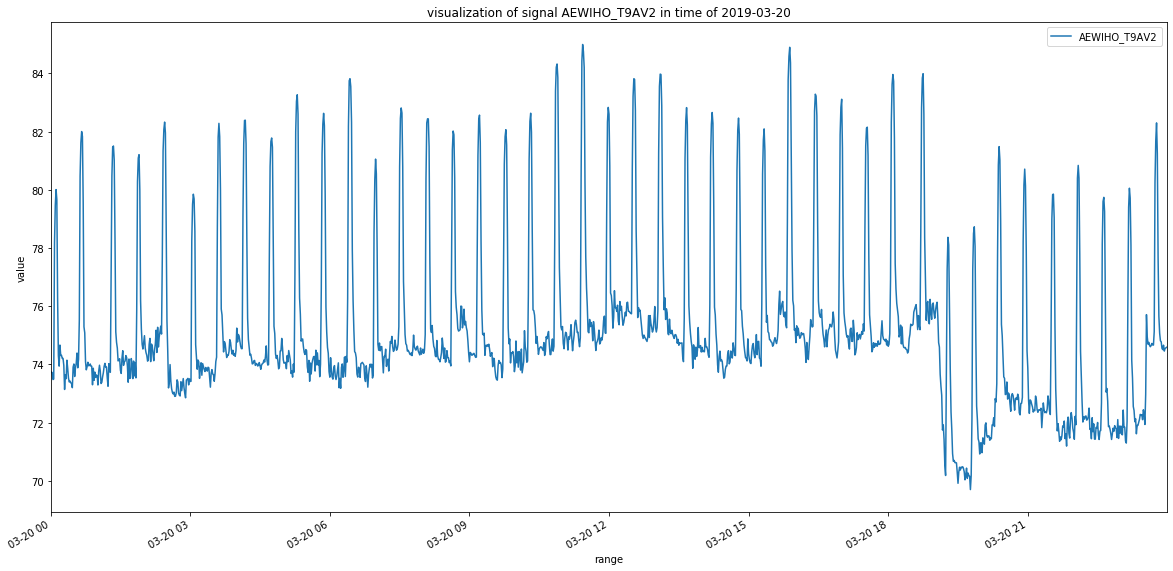

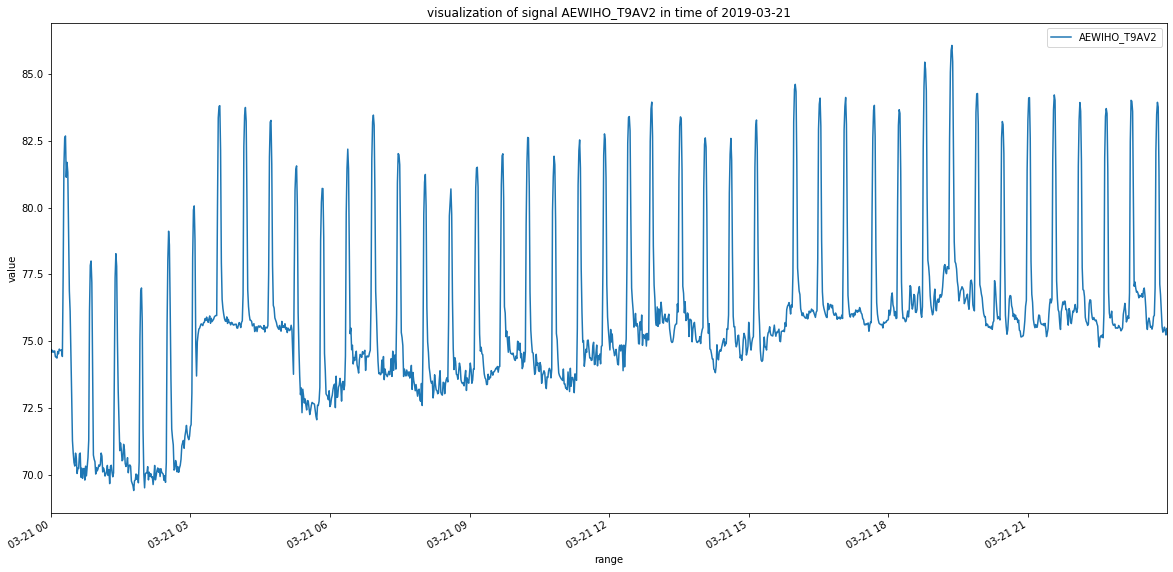

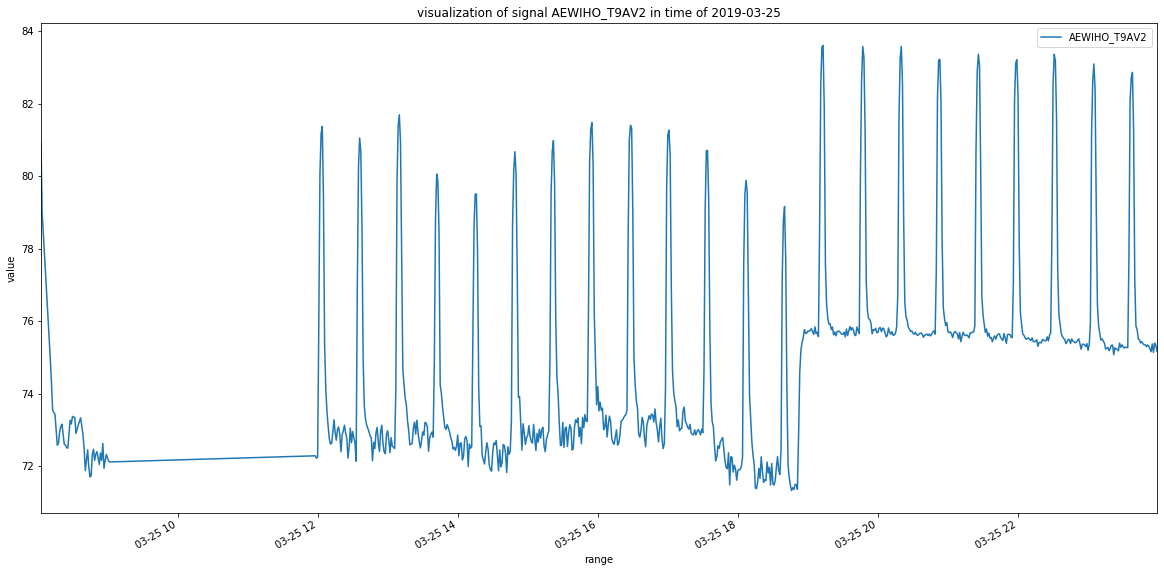

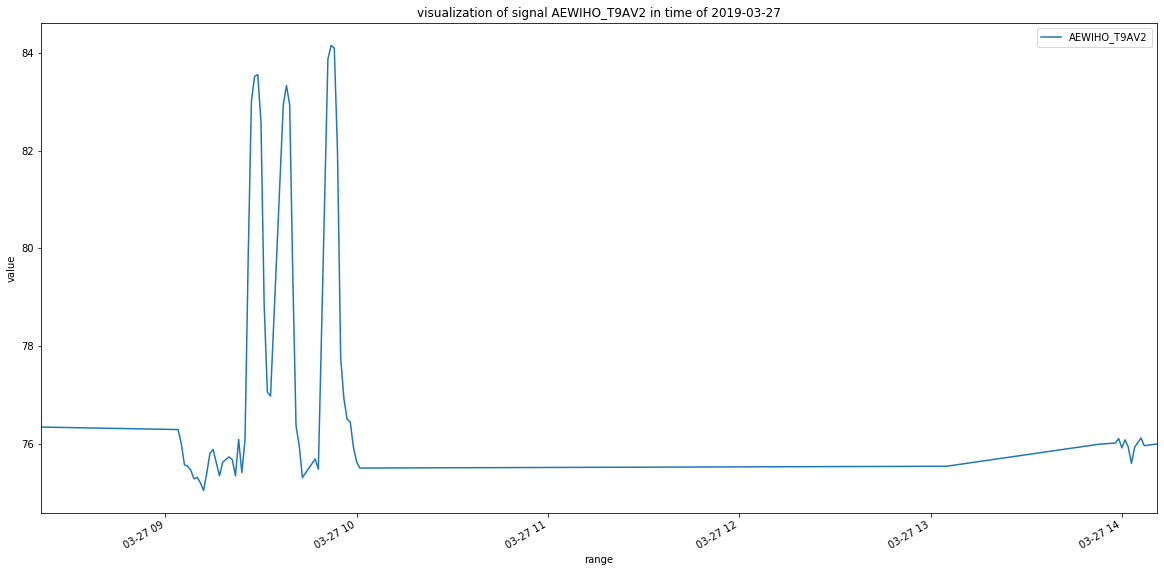

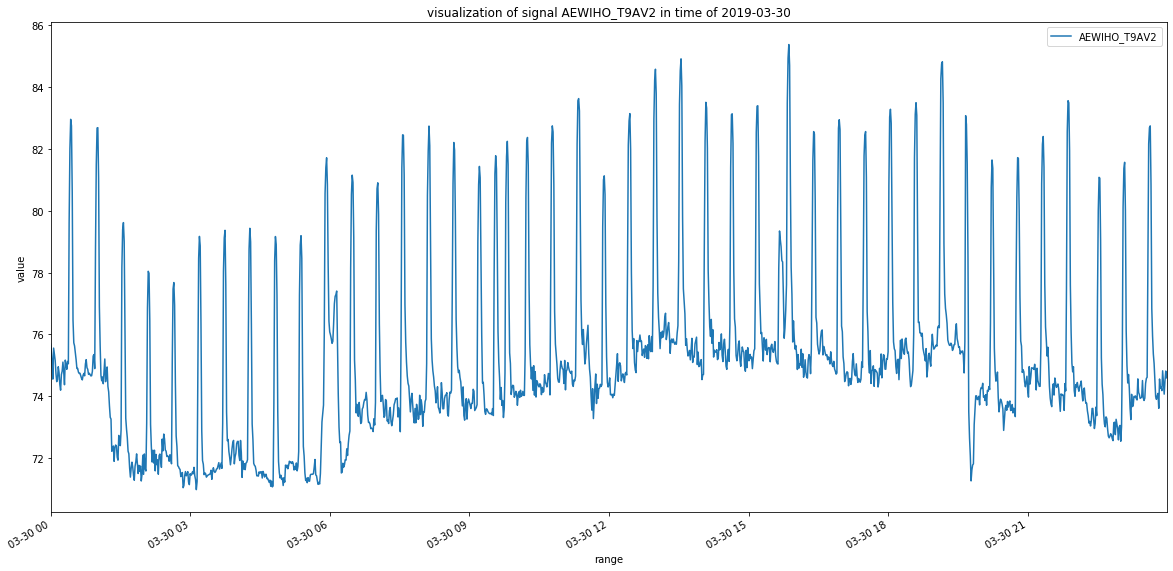

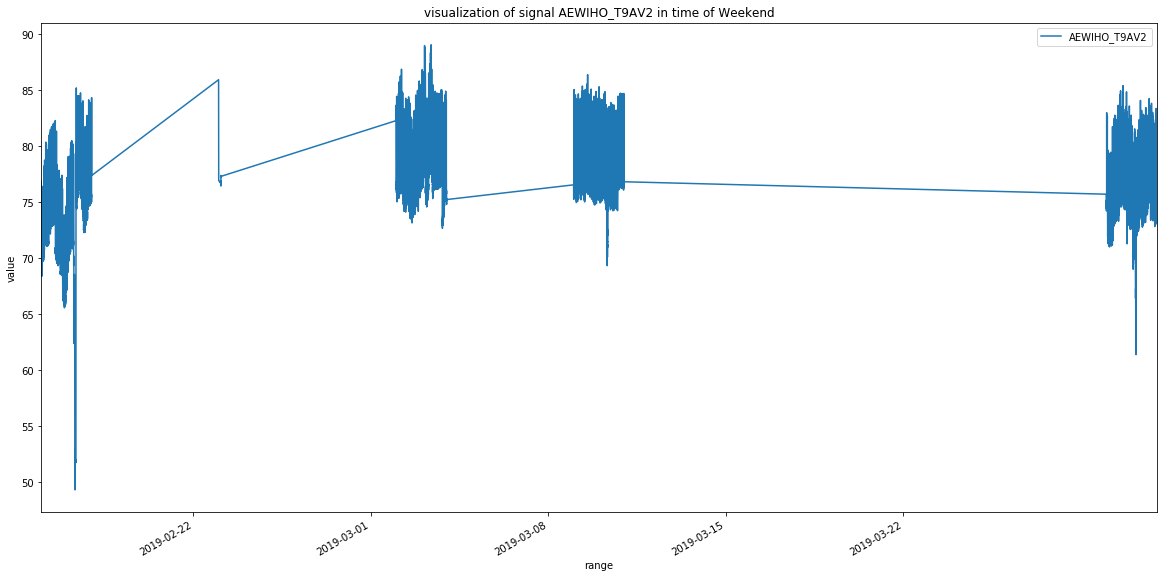

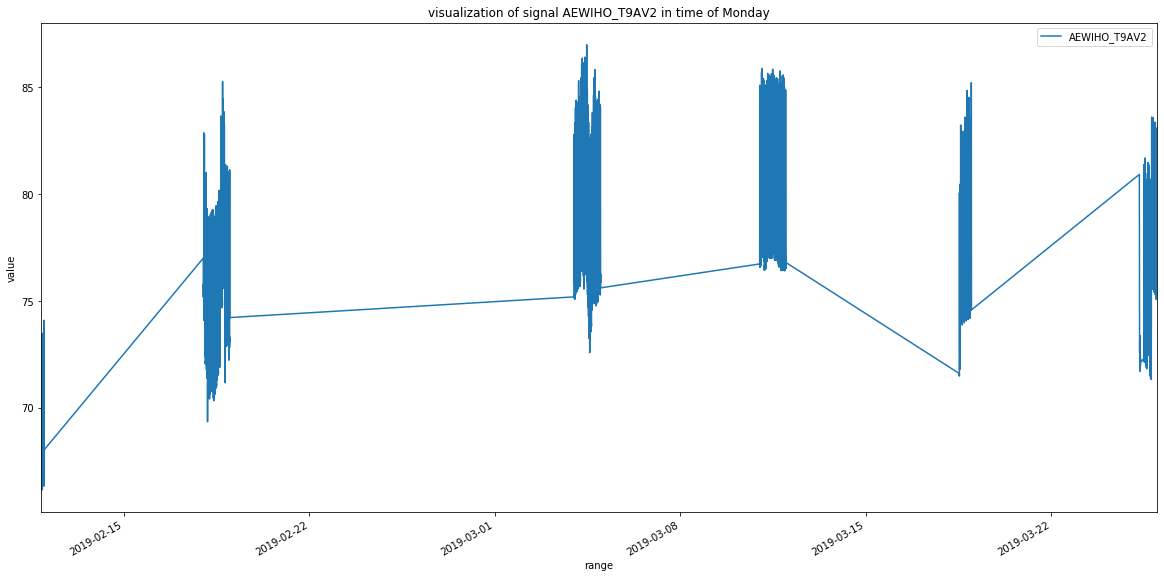

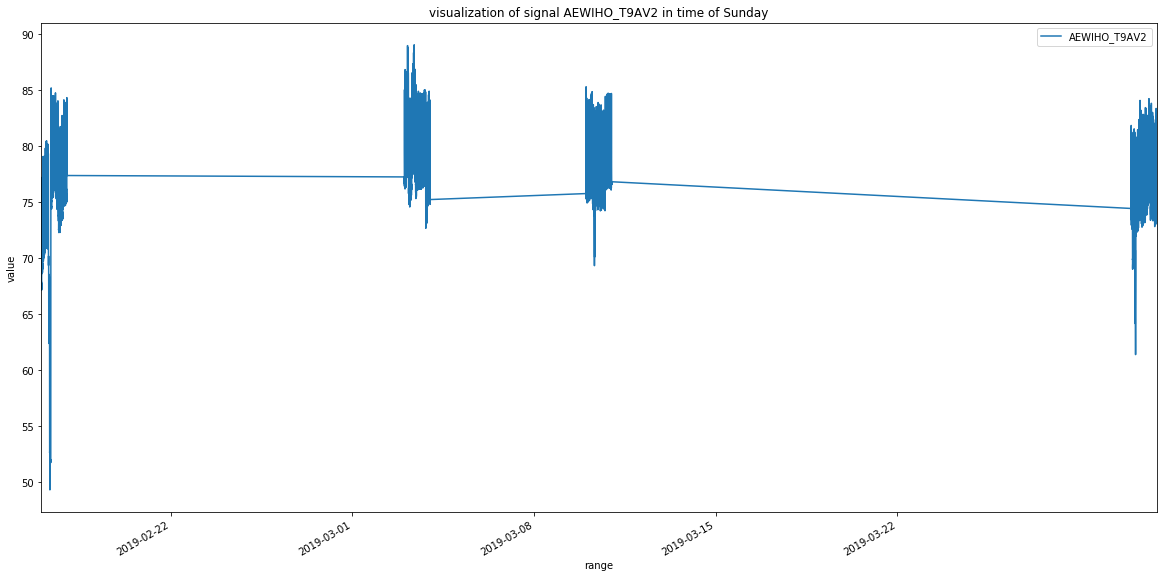

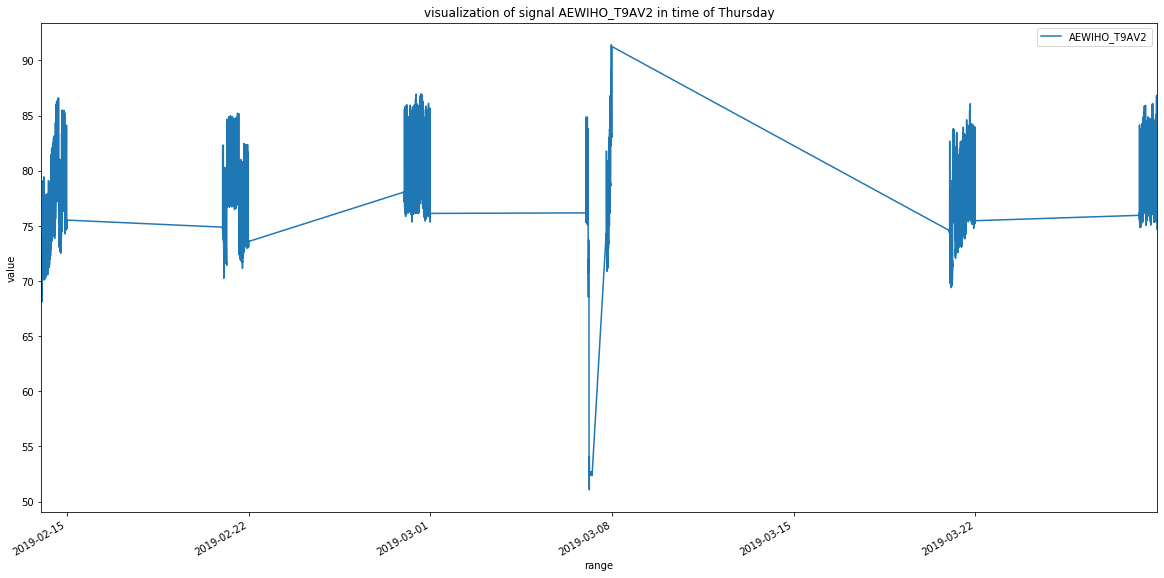

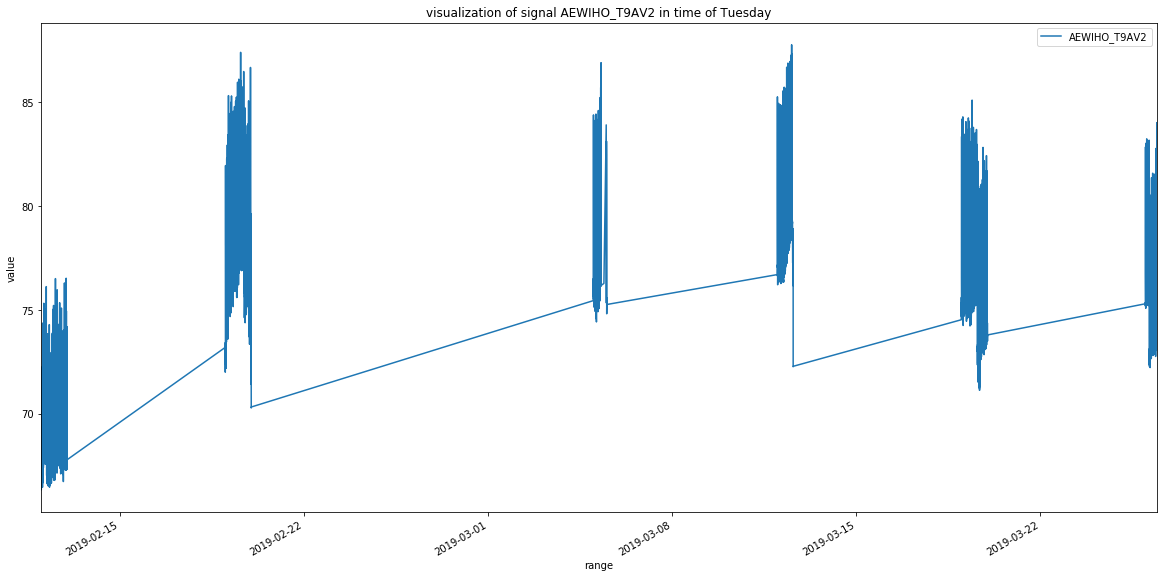

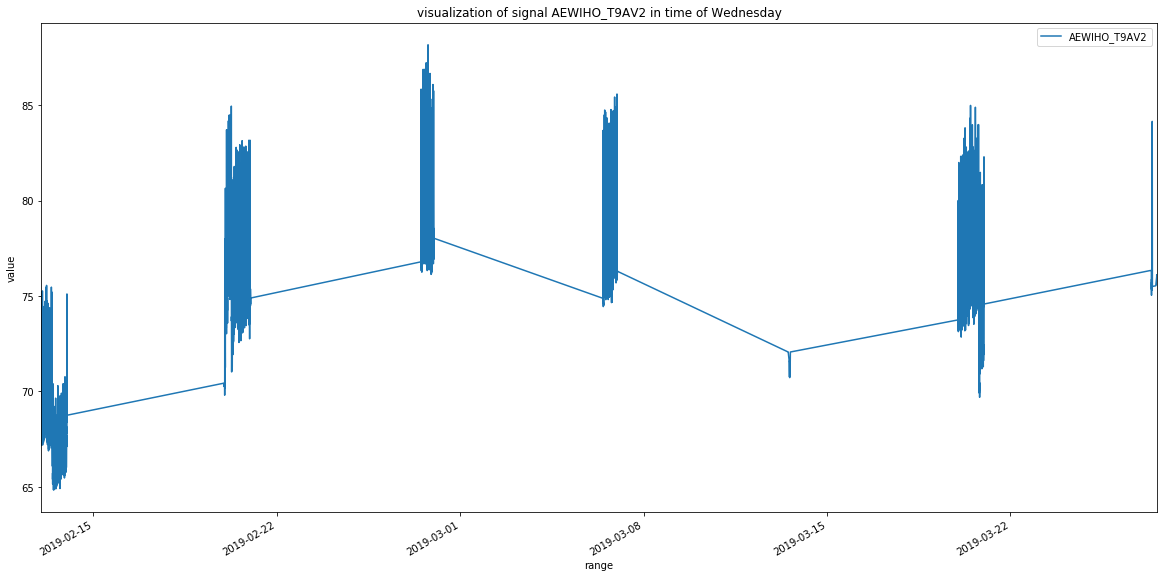

In [60]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [147]:
import sklearn

In [148]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [149]:
my_pred = my_model.predict(test_input)

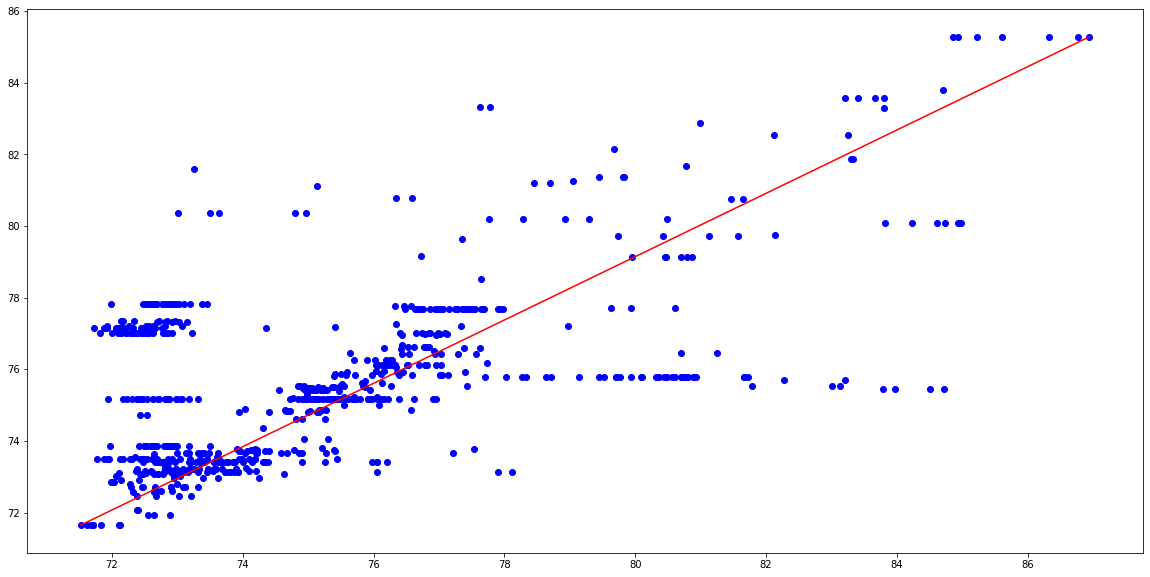

In [151]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [152]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: 0.33
Mean_absolute_error: 1.62
Mean squared error: 6.25
RMSE:  2.4991961535589673


# Neural Network

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [62]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [63]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

W0828 17:49:15.991896 140100366063424 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0828 17:49:16.001887 140100366063424 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
69558/69558 [==============================] - 8s 109us/step - loss: 3.1159 - mean_absolute_error: 3.1159 - acc: 0.0000e+00
Epoch 2/30
69558/69558 [==============================] - 7s 104us/step - loss: 2.6224 - mean_absolute_error: 2.6224 - acc: 0.0000e+00
Epoch 3/30
69558/69558 [==============================] - 8s 112us/step - loss: 2.4993 - mean_absolute_error: 2.4993 - acc: 0.0000e+00
Epoch 4/30
69558/69558 [==============================] - 8s 112us/step - loss: 2.3575 - mean_absolute_error: 2.3575 - acc: 0.0000e+00
Epoch 5/30
69558/69558 [==============================] - 8s 114us/step - loss: 2.2147 - mean_absolute_error: 2.2147 - acc: 0.0000e+00
Epoch 6/30
69558/69558 [==============================] - 8s 114us/step - loss: 2.1618 - mean_absolute_error: 2.1618 - acc: 0.0000e+00
Epoch 7/30
69558/69558 [==============================] - 8s 115us/step - loss: 2.0585 - mean_absolute_error: 2.0585 - acc: 0.0000e+00
Epoch 8/30
69558/69558 [==============================]

In [64]:
predicted_output_NN = NN_model.predict(test_input)

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 0.69
Mean_absolute_error: 3.80
Mean squared error: 26.76
RMSE:  5.173269455444494


In [66]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(703, 1)

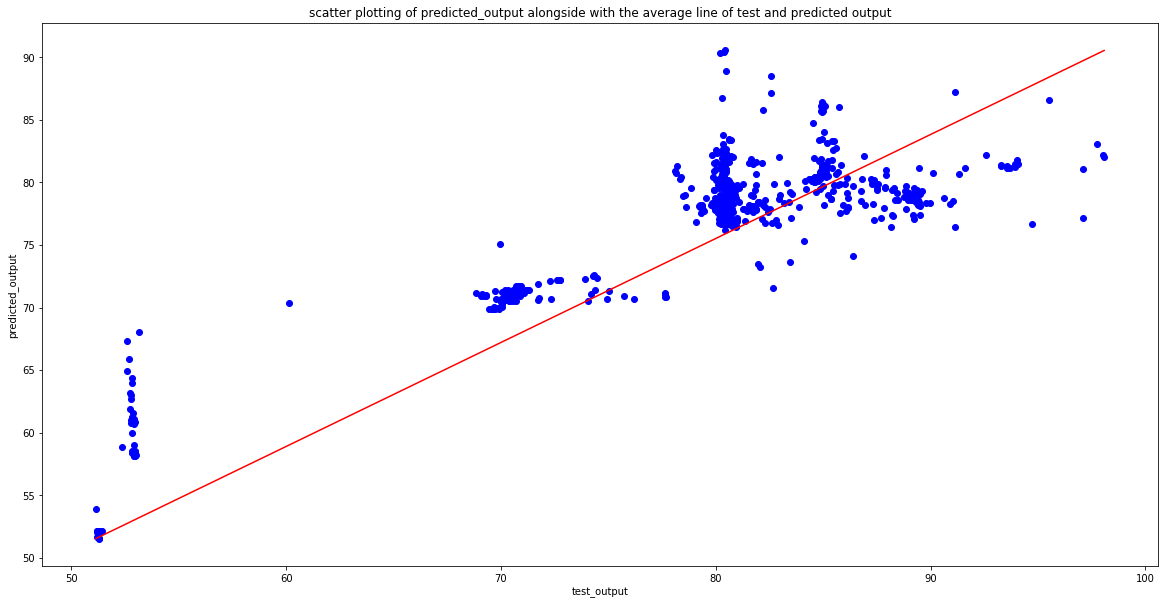

<class 'numpy.ndarray'>


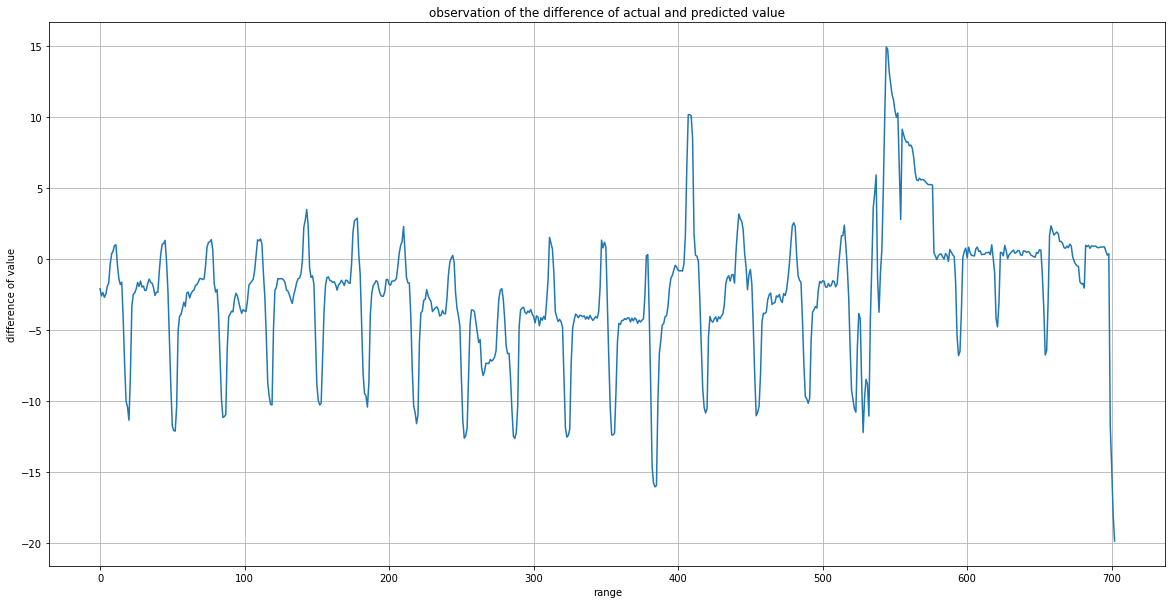

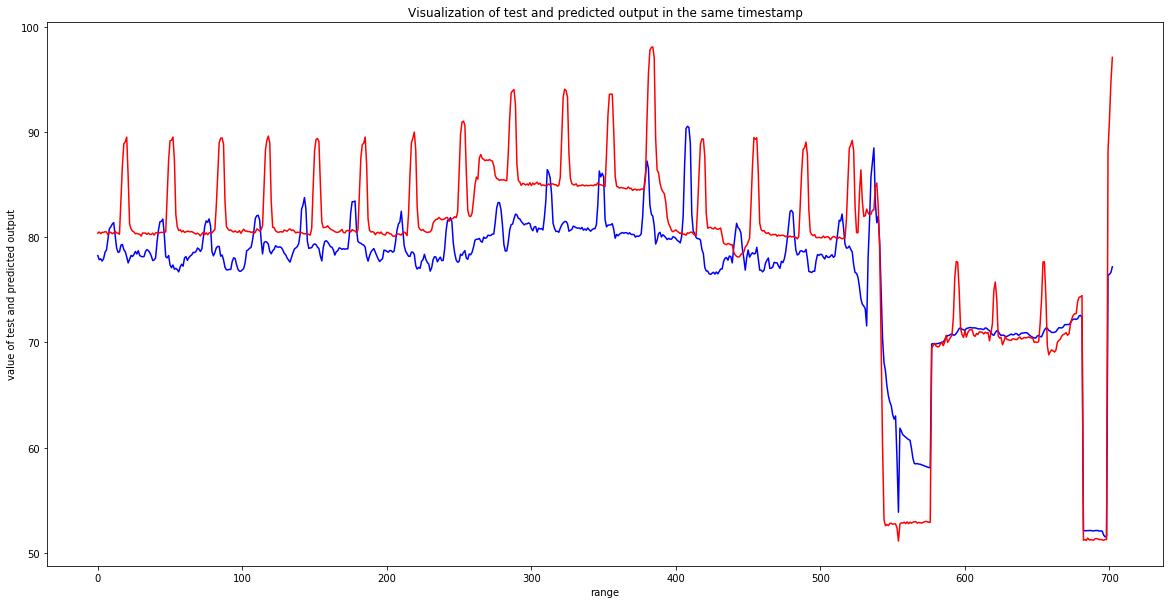

In [67]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [68]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 0.69
Mean_absolute_error: 3.80
Mean squared error: 26.76
RMSE:  5.173269455444494
!!!!---------------!!!!----------------!!!!


# LSTM

In [69]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import callbacks

In [70]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.99)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data = dataset[0:NumberOfElements]
    multiple_ip_test_set = dataset[NumberOfElements:len(dataset)]
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(dataframe_high_correlation)

print('train_data_conv shape: ', multiple_ip_train_data.shape)
print('test_data_conv shape: ', multiple_ip_test_set.shape)

dataset length:  70261
Number of Elements for training:  69558
train_data_conv shape:  (69558, 7)
test_data_conv shape:  (703, 7)


In [71]:
 # split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 2
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, n_steps_1)

print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (69556, 2, 6) 	X_Conv_Lstm size:  834672 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (69556,)  size:  69556  dim:  1


In [72]:
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]

samples = X_Conv_Lstm.shape[0]
time = n_steps_1
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [73]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (69556, 2, 6) 	X_Conv_Lstm size:  834672 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (69556, 2, 1, 6, 1) 	X_Conv_Lstm_train size:  834672 	X_Conv_Lstm_train dimension:  5


In [74]:
# define model

# cbks = [callbacks.LearningRateScheduler(lambda x: 1. / (1. + x))]

lr = 0.01

def lr_schedule(epoch):
#     print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
#     print('now lr_1: ', lr_1)
    return lr_1

batch_size=32
epochs= 30
activation_function = 'relu'

In [75]:
model = Sequential()
# n_seq, 1, n_steps_2, n_features
model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function), input_shape=(time,rows,cols,channels),return_sequences=False))
# model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

W0828 17:53:11.058234 140100366063424 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0828 17:53:11.179719 140100366063424 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1264: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [76]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

W0828 17:53:11.350786 140100366063424 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
69556/69556 [==============================] - 10s 147us/step - loss: 68.2504 - acc: 0.0000e+00
Epoch 2/30
69556/69556 [==============================] - 10s 142us/step - loss: 13.2550 - acc: 0.0000e+00
Epoch 3/30
69556/69556 [==============================] - 10s 142us/step - loss: 12.9492 - acc: 0.0000e+00
Epoch 4/30
69556/69556 [==============================] - 10s 142us/step - loss: 13.0019 - acc: 0.0000e+00
Epoch 5/30
69556/69556 [==============================] - 10s 142us/step - loss: 12.1036 - acc: 0.0000e+00
Epoch 6/30
69556/69556 [==============================] - 10s 142us/step - loss: 11.7461 - acc: 0.0000e+00
Epoch 7/30
69556/69556 [==============================] - 10s 142us/step - loss: 11.6972 - acc: 0.0000e+00
Epoch 8/30
69556/69556 [==============================] - 10s 142us/step - loss: 11.3798 - acc: 0.0000e+00
Epoch 9/30
69556/69556 [==============================] - 10s 142us/step - loss: 11.2871 - acc: 0.0000e+00
Epoch 10/30
69556/69556 [============

In [77]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (701, 2, 6) 	 X_Conv_Lstm_test dimension:  3
y_Conv_Lstm_test shape:  (701,) 	 y_Conv_Lstm_test dimension:  1


In [78]:
from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5')

yhat = model.predict(x_input, verbose=1)
# print(yhat)

701/701 [==============================] - 0s 162us/step


In [79]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(y_Conv_Lstm_test,yhat))
print("Mean_absolute_error: %.2f" % mean_absolute_error(y_Conv_Lstm_test,yhat))
print("Mean squared error: %.2f" % mean_squared_error(y_Conv_Lstm_test,yhat))
RMSE=math.sqrt(mean_squared_error(y_Conv_Lstm_test,yhat))
print('RMSE: ',RMSE)

r_2 statistic: 0.77
Mean_absolute_error: 3.04
Mean squared error: 19.54
RMSE:  4.420893399771465


In [80]:
# plt.plot((min(y_Conv_Lstm_test), max(y_Conv_Lstm_test)), (min(yhat), max(yhat)), color='red')
# plt.scatter(y_Conv_Lstm_test, yhat, color='blue')

In [81]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

(701, 1)

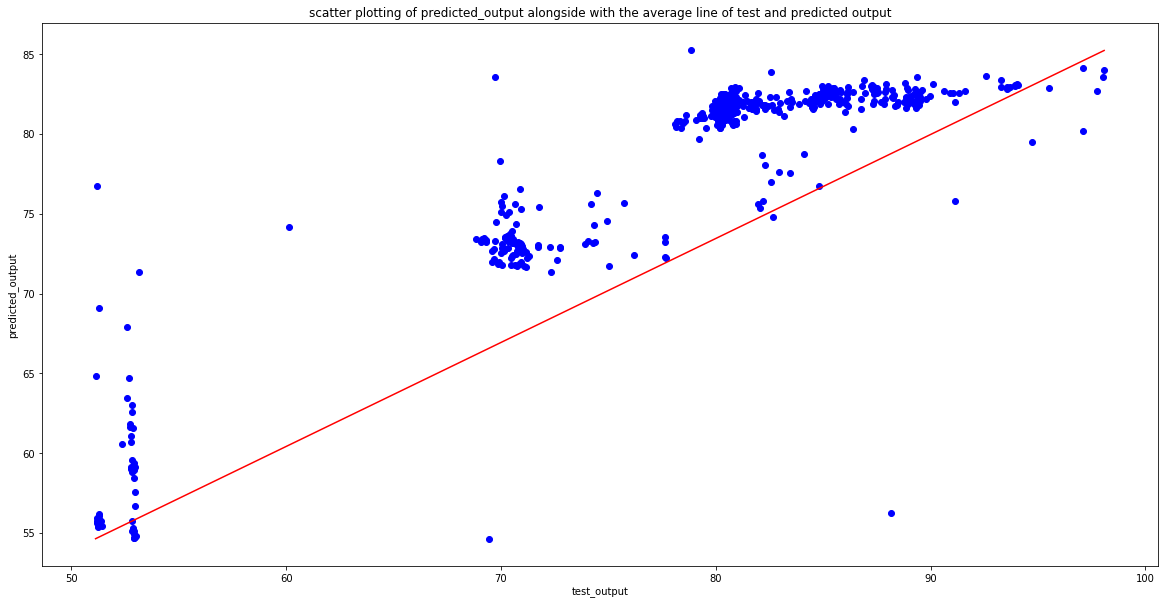

<class 'numpy.ndarray'>


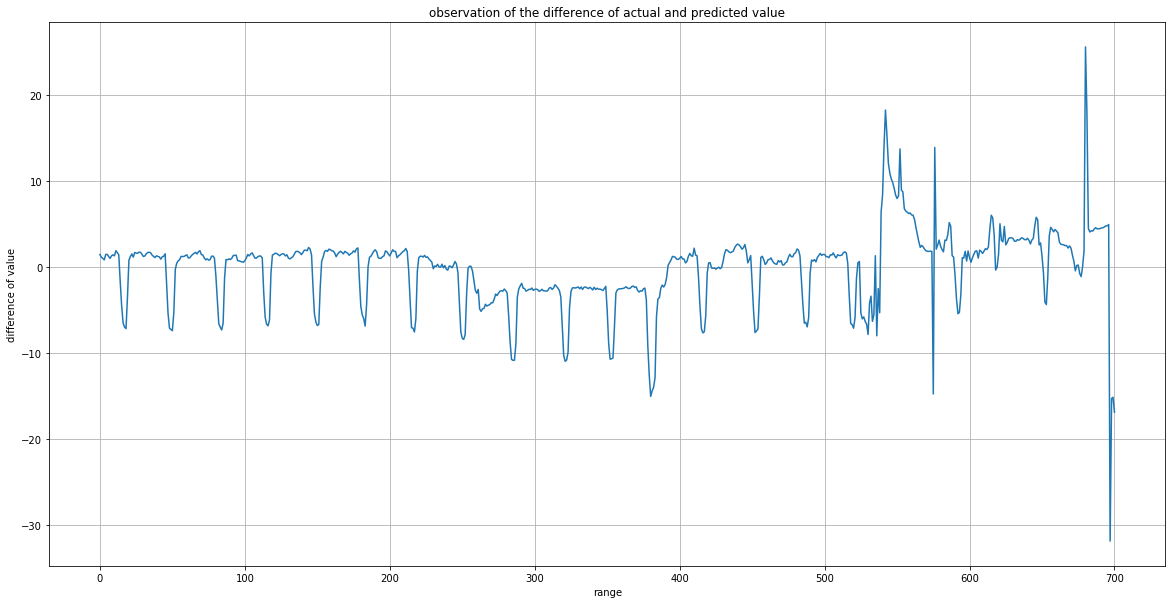

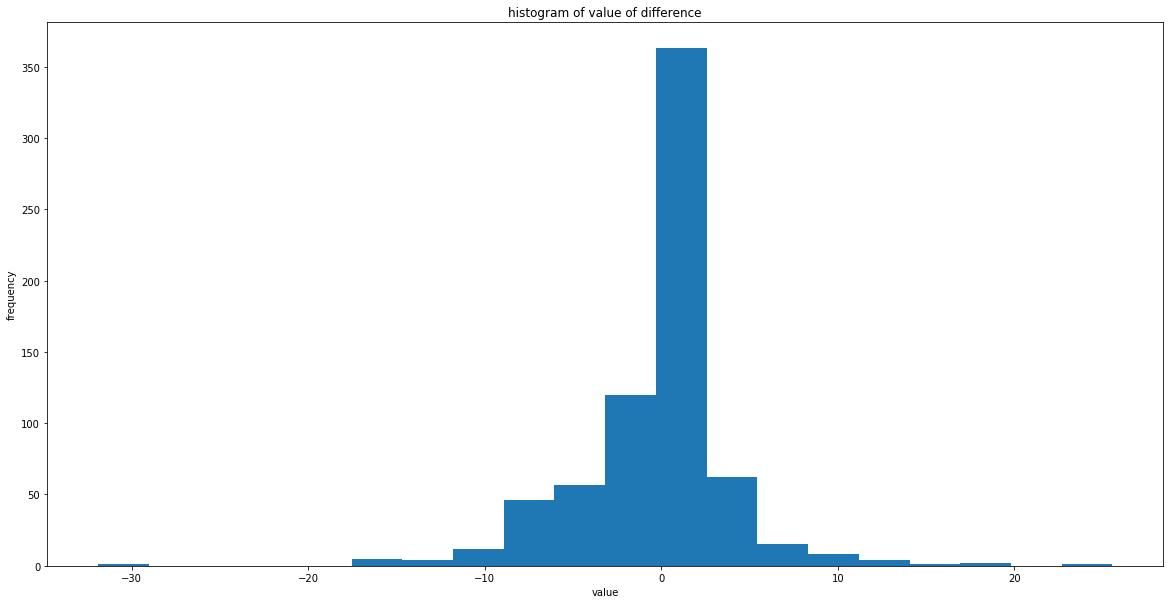

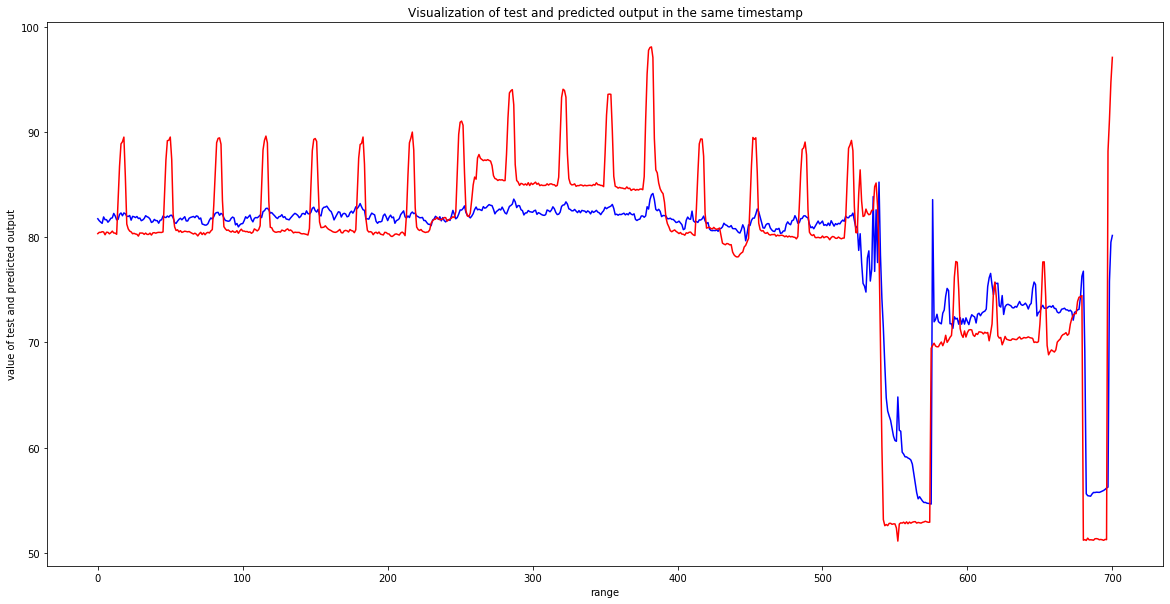

In [82]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [83]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.77
Mean_absolute_error: 3.04
Mean squared error: 19.54
RMSE:  4.420893399771465
!!!!---------------!!!!----------------!!!!


In [ ]:
dataframe_datetime.tail()

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)